# Perceptron

## Fungsi-fungsi *Plotting*

Jangan mengubah kode pada *cell* di bawah ini.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def line(w, th=0):
    w2 = w[2] + .001 if w[2] == 0 else w[2]

    return lambda x: (th - w[1] * x - w[0]) / w2


def plot(f1, f2, X, target, padding=1, marker='o'):
    X = np.array(X)

    x_vals, y_vals = X[:, 1], X[:, 2]
    xmin, xmax, ymin, ymax = x_vals.min(), x_vals.max(), y_vals.min(), y_vals.max()
    markers = f'r{marker}', f'b{marker}'
    line_x = np.arange(xmin-padding-1, xmax+padding+1)

    for c, v in enumerate(np.unique(target)):
        p = X[np.where(target == v)]

        plt.plot(p[:,1], p[:,2], markers[c])

    plt.axis([xmin-padding, xmax+padding, ymin-padding, ymax+padding])
    plt.plot(line_x, f1(line_x))
    plt.plot(line_x, f2(line_x))
    plt.show()

## Praktikum

### a) Fungsi *Step* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [2]:
def percep_step(input, th=0):
  return 1 if input > th else -1 if input < -th else 0

### b) Fungsi *training* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [3]:
def percep_fit(X, target, th=0, a=1, max_epoch=10, verbose=False, draw=False):
  w = np.zeros(len(X[0]) + 1)
  bias = np.ones((len(X), 1))
  X = np.hstack((bias, X))
  stop = False
  epoch = 0
  while not stop and (max_epoch == -1 or epoch < max_epoch):
    stop = True
    epoch += 1
    if verbose:
      print('\nEpoch', epoch)
      for r, row in enumerate(X):
        y_in = np.dot(row, w)
        y = percep_step(y_in, th)
        if y != target[r]:
          stop = False
          w = [w[i] + a * target[r] * row[i] for i in range(len(row))]
          if verbose:
            print('Bobot:', w)
          if draw:
            plot(line(w, th), line(w, -th), X, target)
  return w, epoch


### c) Fungsi *testing* Perceptron

Tulis kode ke dalam *cell* di bawah ini:

In [4]:
def percep_predict(X, w, th=0):
    Y = []
    for x in X:
        y_in = w[0] + np.dot(x, w[1:])
        y = percep_step(y_in, th)
        Y.append(y)
    return Y

In [5]:
def calc_accuracy(a, b):
    s = [1 if a[i] == b[i] else 0 for i in range(len(a))]
    return sum(s) / len(a)


## Soal


Gunakan dataset "data.csv" yang telah dilampirkan

In [6]:
from google.colab import files
kontak = files.upload()
for fn in kontak.keys():
  print('Nama file "{name}" dengan panjang {length} bytes'.format(
      name=fn, length=len(kontak[fn])))

Saving data.csv to data.csv
Nama file "data.csv" dengan panjang 37304 bytes


In [7]:
import pandas as pd

data = pd.read_csv('data.csv')

Kolom Activity berperan sebagai label dan memiliki beberapa kelas:
1. SITTING
2. LAYING
3. WALKING
4. STANDING
5. WALKING_DOWNSTAIRS
6. WALKING_UPSTAIRS

In [8]:
print(data)

            x         y         z            Activity
0    0.288585 -0.020294 -0.132905            STANDING
1    0.278419 -0.016411 -0.123520            STANDING
2    0.279653 -0.019467 -0.113462            STANDING
3    0.279174 -0.026201 -0.123283            STANDING
4    0.276629 -0.016570 -0.115362            STANDING
..        ...       ...       ...                 ...
795  0.356419  0.001897 -0.094958             WALKING
796  0.342112 -0.044194 -0.109427             WALKING
797  0.263759  0.047500 -0.043263  WALKING_DOWNSTAIRS
798  0.278577 -0.002049 -0.111989  WALKING_DOWNSTAIRS
799  0.285249 -0.027630 -0.125218  WALKING_DOWNSTAIRS

[800 rows x 4 columns]


Hapuslah kelas hingga hanya nyisakan kelas: LAYING dan WALKING_DOWNSTAIRS

In [9]:
data = data[~data['Activity'].isin(['SITTING', 'WALKING', 'STANDING', 'WALKING_UPSTAIRS'])] #Praktikan menghapus kelas kelas yang tidak digunakan

In [10]:
print(data)

            x         y         z            Activity
51   0.403474 -0.015074 -0.118167              LAYING
52   0.278373 -0.020561 -0.096825              LAYING
53   0.276555 -0.017869 -0.107621              LAYING
54   0.279575 -0.017276 -0.109481              LAYING
55   0.276527 -0.016819 -0.107983              LAYING
..        ...       ...       ...                 ...
765  0.276176 -0.015495 -0.112024              LAYING
766  0.290287 -0.017847 -0.108830              LAYING
797  0.263759  0.047500 -0.043263  WALKING_DOWNSTAIRS
798  0.278577 -0.002049 -0.111989  WALKING_DOWNSTAIRS
799  0.285249 -0.027630 -0.125218  WALKING_DOWNSTAIRS

[241 rows x 4 columns]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

X = data[['x', 'y', 'z']].to_numpy()
X = minmax_scale(X)

y = data['Activity'].to_numpy()
c = {'LAYING': -1, 'WALKING_DOWNSTAIRS': 1} # Praktikan mengubah kedua kelas target  menjadi 1 dan -1
#y = [c[i] for i in y]
y = data['Activity'].map(c).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=10, test_size=.3)


Epoch 1
Bobot: [-0.0001, -7.741934851246608e-05, -8.309881820989258e-05, -6.762238106057121e-05]


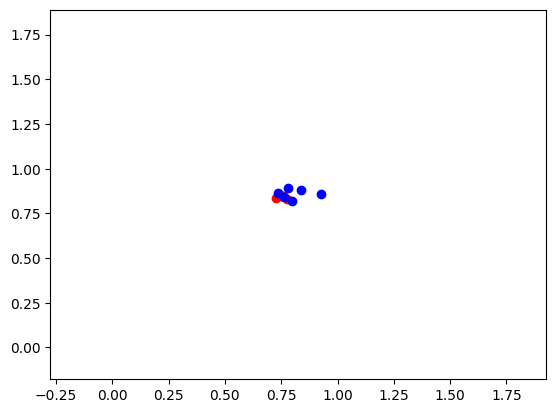

Bobot: [0.0, 2.3649188806372626e-06, -9.0178178138126e-07, 2.3156083789427985e-06]


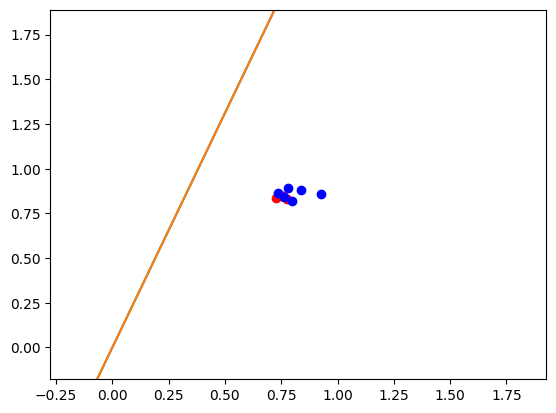

Bobot: [-0.0001, -7.336860626057262e-05, -8.536407406769393e-05, -6.459574204200902e-05]


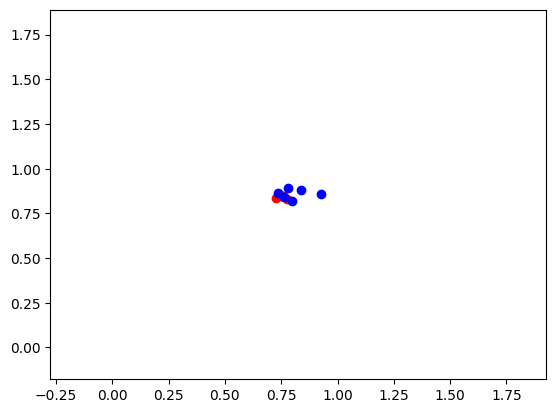

Bobot: [0.0, 1.9448430515879816e-05, 4.657239941885242e-07, -2.9226912240179346e-06]


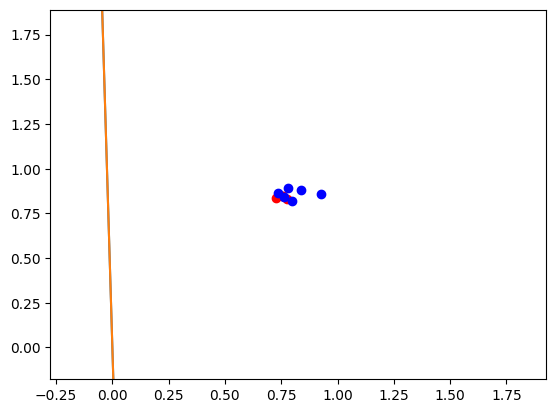

Bobot: [-0.0001, -5.306314388335128e-05, -8.312410857074662e-05, -7.19964877192402e-05]


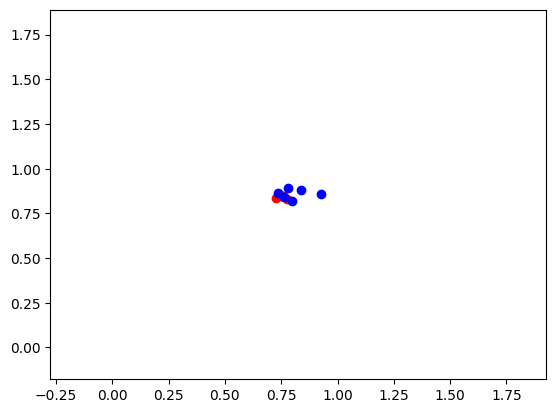

Bobot: [0.0, 2.4813202142912307e-05, 5.850952375070618e-06, -9.852465703014726e-06]


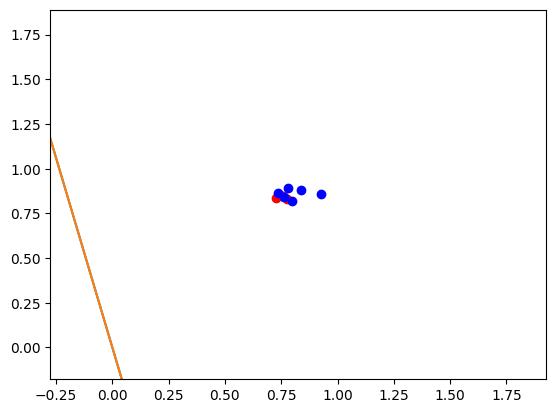

Bobot: [-0.0001, -5.0689709102603284e-05, -7.899248086426569e-05, -7.601764983012908e-05]


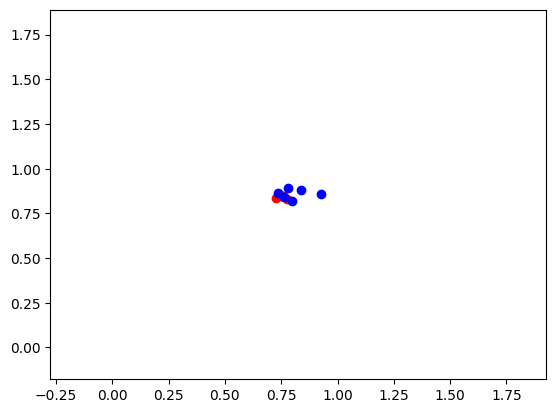

Bobot: [0.0, 2.2943213708919566e-05, 7.410986253555548e-06, -6.992713263471279e-06]


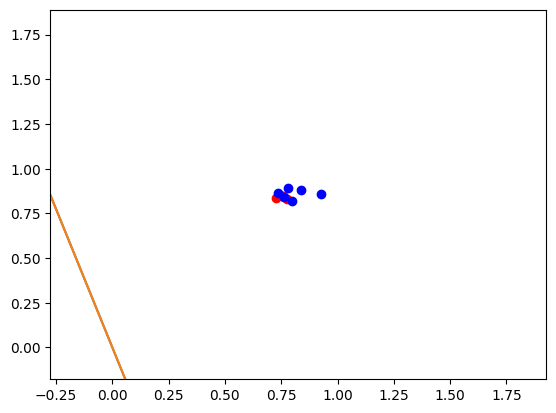


Epoch 2
Bobot: [-0.0001, -5.447613480354651e-05, -7.568783195633703e-05, -7.461509432404249e-05]


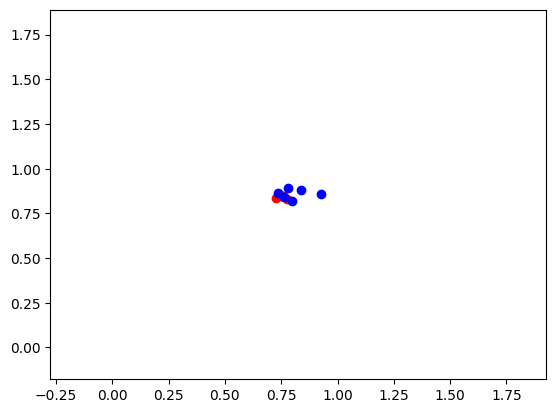

Bobot: [0.0, 2.530813258955683e-05, 6.509204472174288e-06, -4.677104884528481e-06]


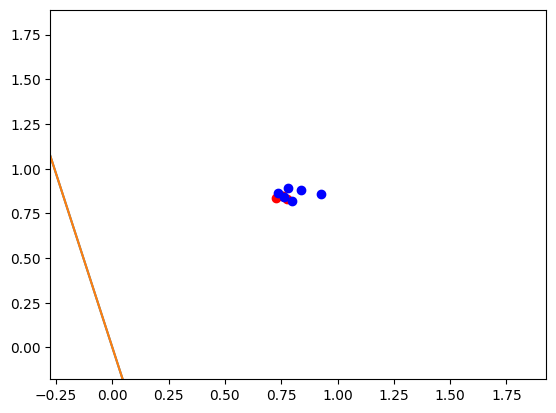

Bobot: [-0.0001, -5.0425392551653055e-05, -7.795308781413838e-05, -7.15884553054803e-05]


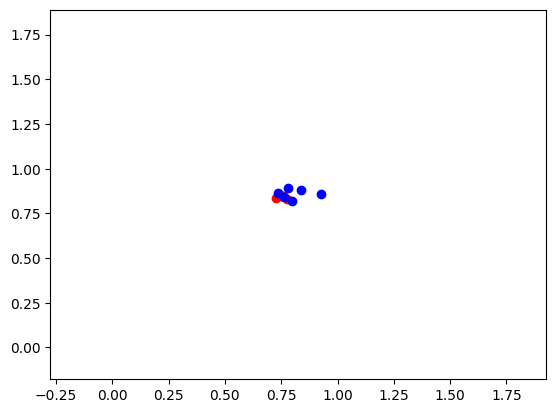

Bobot: [0.0, 4.239164422479938e-05, 7.876710247744072e-06, -9.915404487489214e-06]


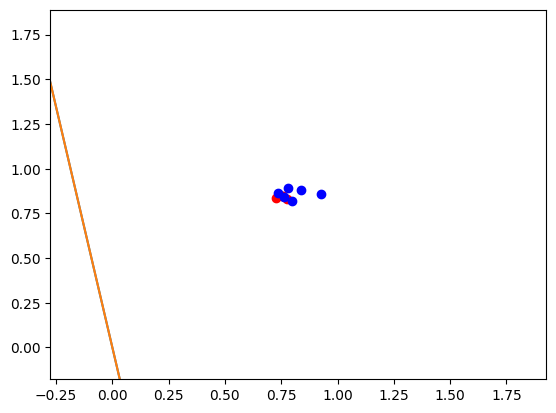

Bobot: [-0.0001, -3.0119930174431716e-05, -7.571312231719107e-05, -7.898920098271148e-05]


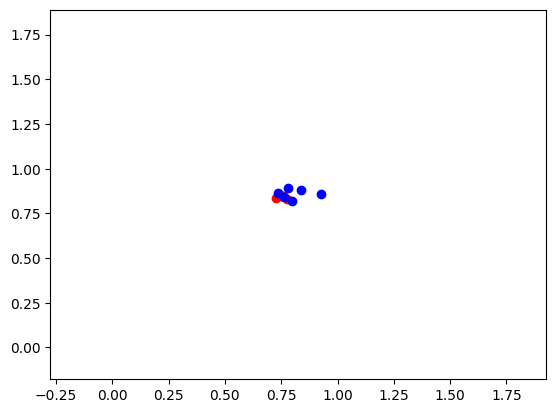

Bobot: [0.0, 4.7756415851831873e-05, 1.3261938628626166e-05, -1.6845178966486005e-05]


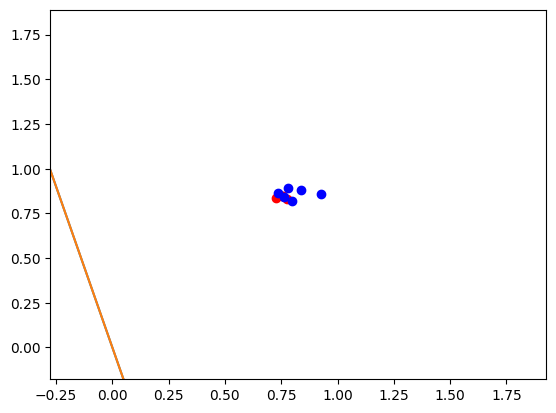

Bobot: [-0.0001, -2.7746495393683718e-05, -7.158149461071014e-05, -8.301036309360036e-05]


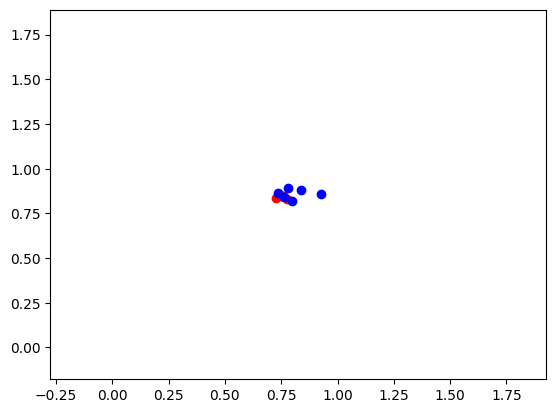

Bobot: [0.0, 4.588642741783913e-05, 1.4821972507111095e-05, -1.3985426526942559e-05]


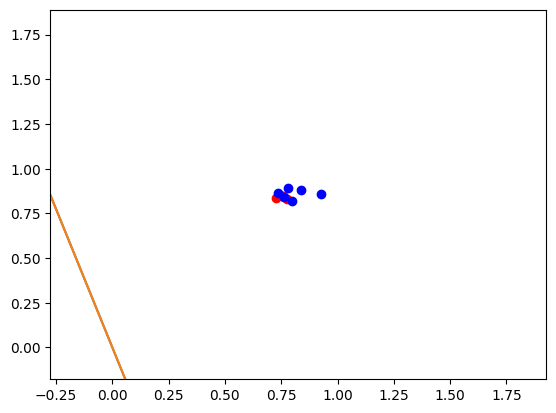


Epoch 3
Bobot: [-0.0001, -3.1532921094626945e-05, -6.827684570278148e-05, -8.160780758751377e-05]


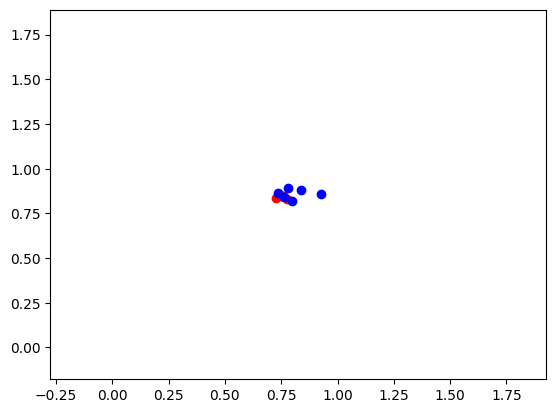

Bobot: [0.0, 4.8251346298476395e-05, 1.3920190725729835e-05, -1.166981814799976e-05]


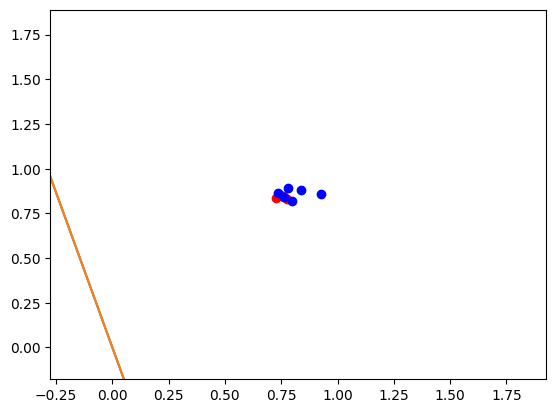

Bobot: [-0.0001, -2.748217884273349e-05, -7.054210156058284e-05, -7.858116856895157e-05]


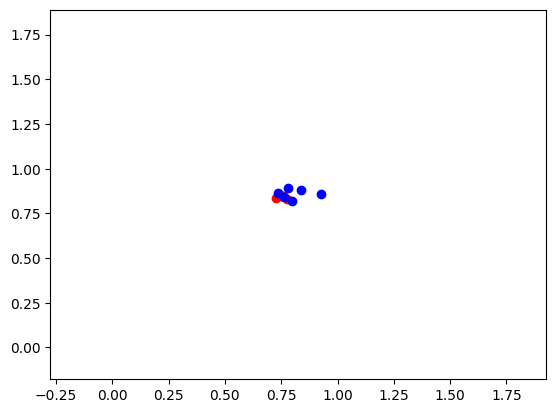

Bobot: [0.0, 6.533485793371895e-05, 1.528769650129962e-05, -1.6908117750960493e-05]


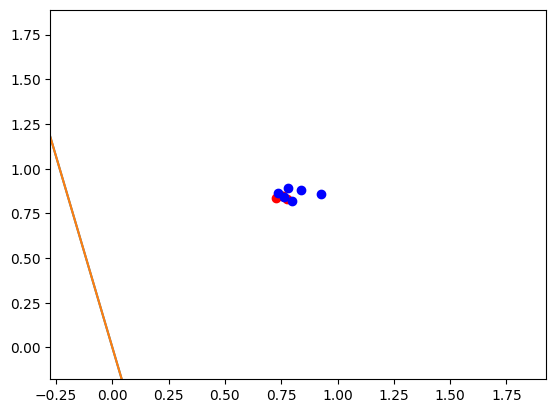

Bobot: [-0.0001, -7.176716465512149e-06, -6.830213606363552e-05, -8.598191424618276e-05]


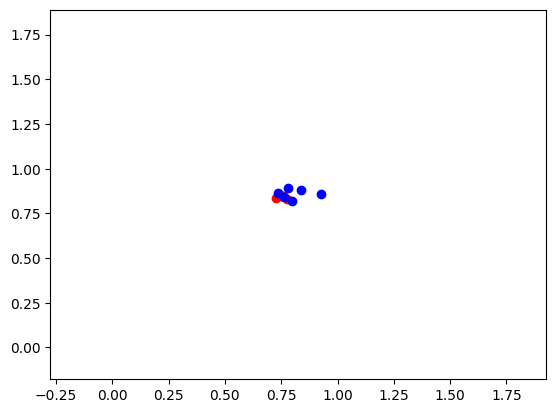

Bobot: [0.0, 7.069962956075144e-05, 2.0672924882181713e-05, -2.3837892229957284e-05]


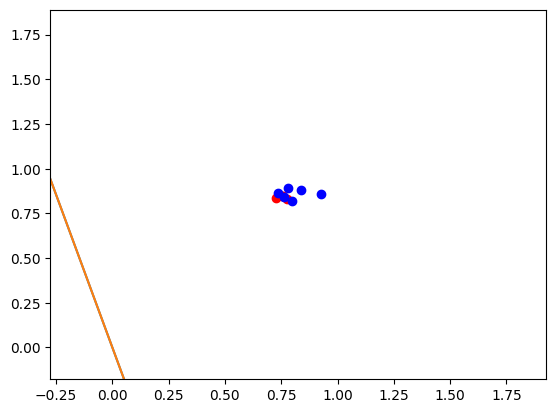

Bobot: [-0.0001, -4.803281684764152e-06, -6.41705083571546e-05, -9.000307635707164e-05]


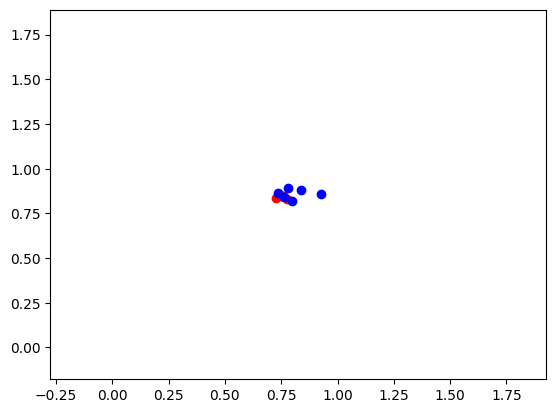

Bobot: [0.0, 6.88296411267587e-05, 2.2232958760666643e-05, -2.0978139790413838e-05]


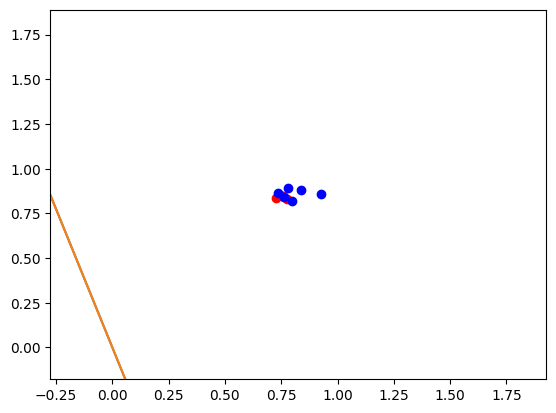


Epoch 4
Bobot: [-0.0001, -8.589707385707378e-06, -6.086585944922593e-05, -8.860052085098505e-05]


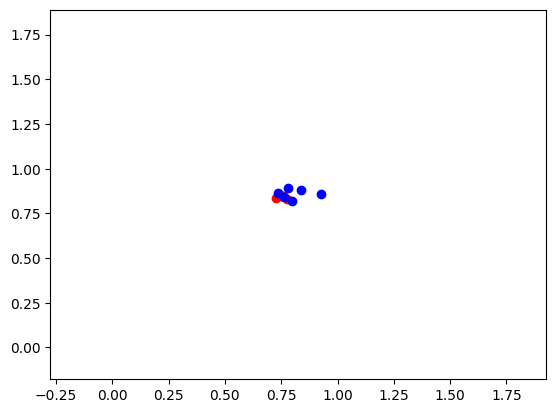

Bobot: [0.0, 7.119456000739596e-05, 2.1331176979285383e-05, -1.866253141147104e-05]


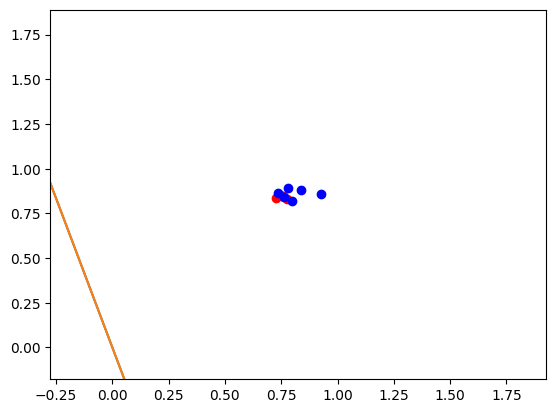

Bobot: [-0.0001, -4.538965133813922e-06, -6.313111530702729e-05, -8.557388183242285e-05]


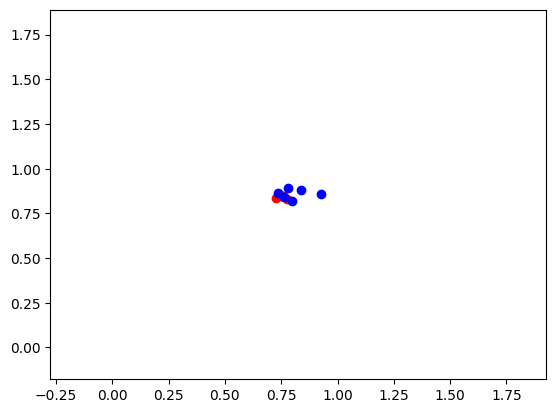

Bobot: [0.0, 8.827807164263852e-05, 2.2698682754855167e-05, -2.3900831014431772e-05]


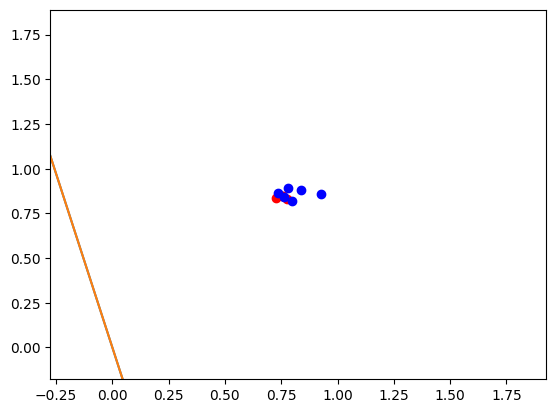

Bobot: [-0.0001, 1.5766497243407417e-05, -6.0891149810079974e-05, -9.297462750965404e-05]


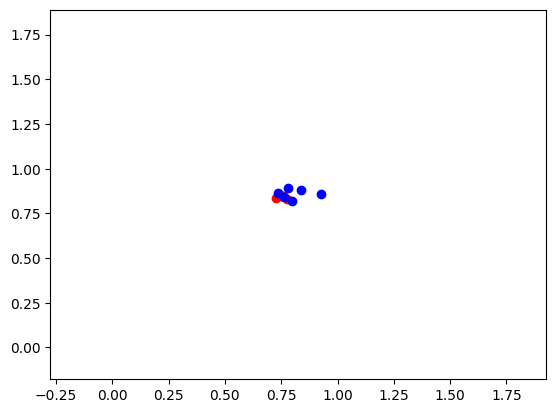

Bobot: [0.0, 9.3642843269671e-05, 2.808391113573726e-05, -3.0830605493428563e-05]


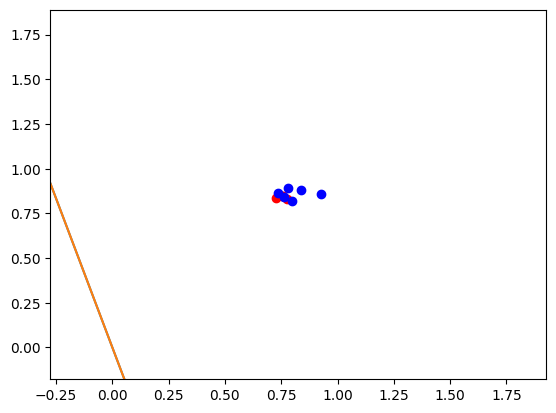

Bobot: [-0.0001, 1.8139932024155414e-05, -5.6759522103599046e-05, -9.699578962054292e-05]


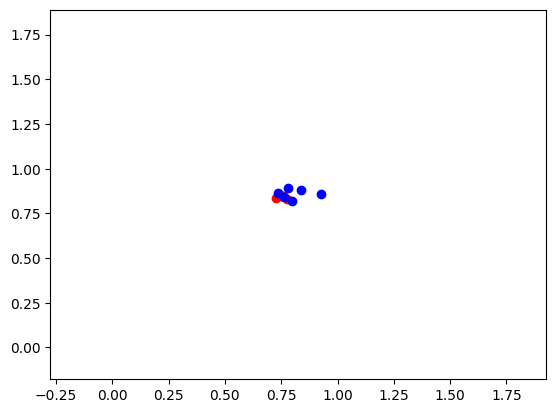

Bobot: [0.0, 9.177285483567826e-05, 2.964394501422219e-05, -2.7970853053885117e-05]


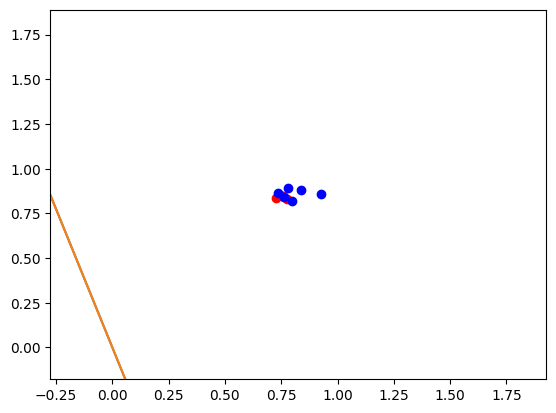


Epoch 5
Bobot: [-0.0001, 1.4353506323212188e-05, -5.3454873195670386e-05, -9.559323411445633e-05]


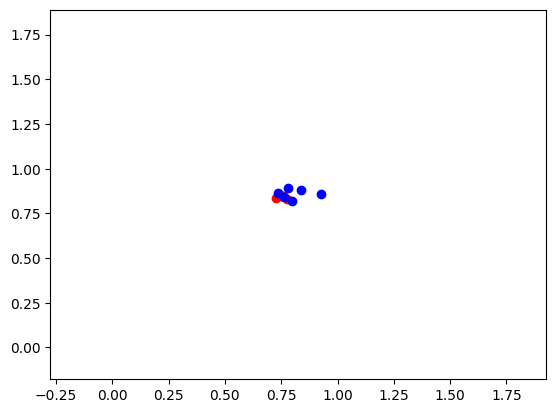

Bobot: [0.0, 9.413777371631553e-05, 2.874216323284093e-05, -2.565524467494232e-05]


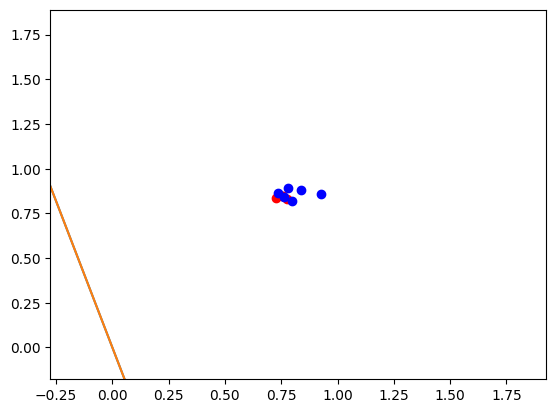

Bobot: [-0.0001, 1.8404248575105644e-05, -5.572012905347174e-05, -9.256659509589413e-05]


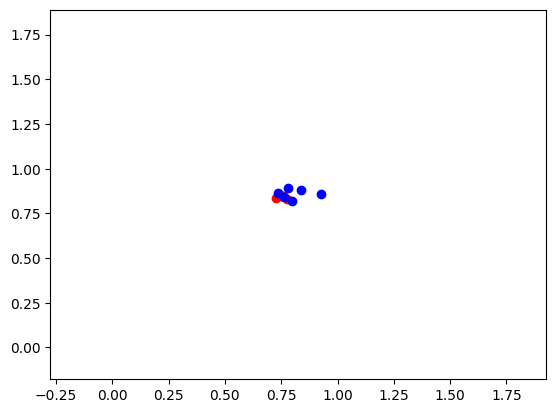

Bobot: [0.0, 0.00011122128535155808, 3.0109669008410715e-05, -3.089354427790305e-05]


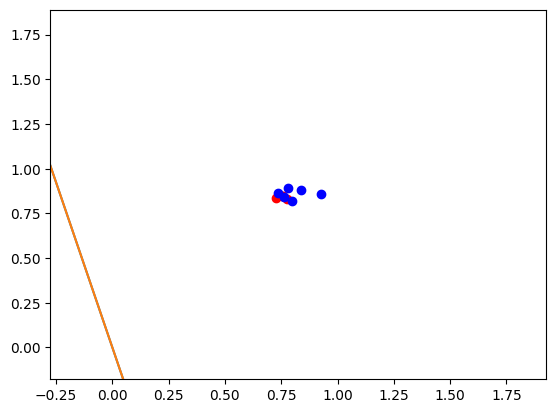

Bobot: [-0.0001, 3.870971095232698e-05, -5.3480163556524426e-05, -9.996734077312532e-05]


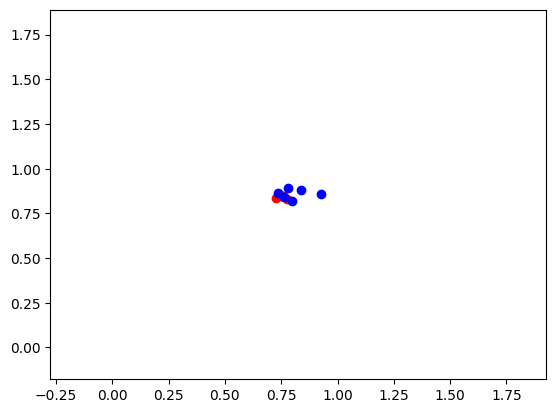

Bobot: [0.0, 0.00011658605697859057, 3.549489738929281e-05, -3.782331875689984e-05]


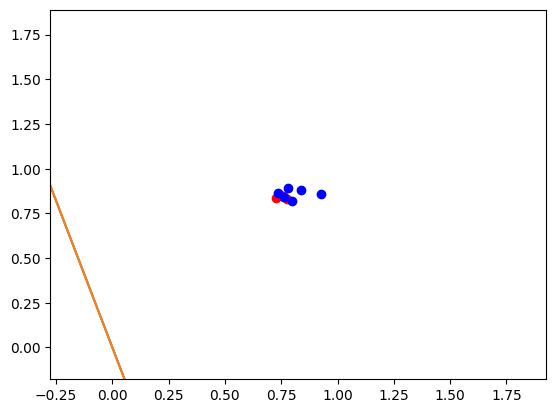

Bobot: [-0.0001, 4.108314573307498e-05, -4.93485358500435e-05, -0.0001039885028840142]


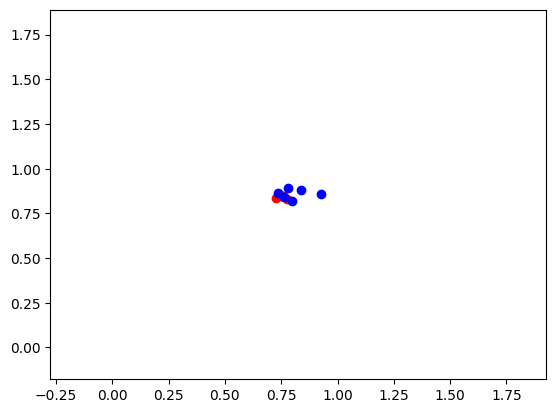

Bobot: [0.0, 0.00011471606854459783, 3.705493126777774e-05, -3.4963566317356397e-05]


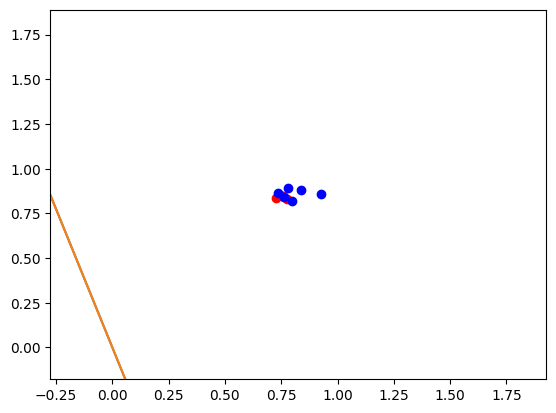


Epoch 6
Bobot: [-0.0001, 3.7296720032131754e-05, -4.604388694211484e-05, -0.00010258594737792761]


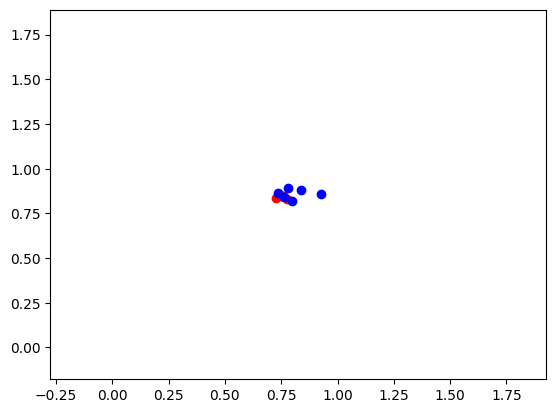

Bobot: [0.0, 0.0001170809874252351, 3.615314948639648e-05, -3.26479579384136e-05]


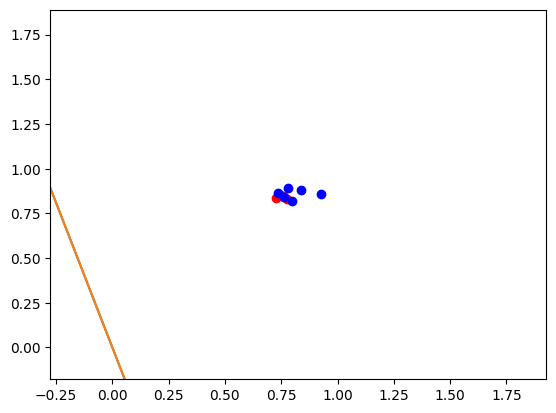

Bobot: [-0.0001, 4.134746228402521e-05, -4.8309142799916194e-05, -9.955930835936541e-05]


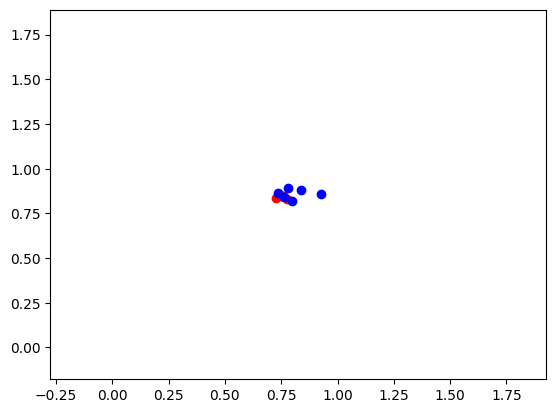

Bobot: [0.0, 0.00013416449906047766, 3.752065526196626e-05, -3.788625754137433e-05]


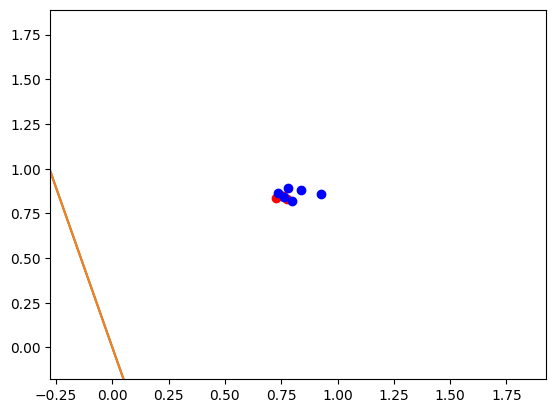

Bobot: [-0.0001, 6.165292466124656e-05, -4.606917730296888e-05, -0.0001069600540365966]


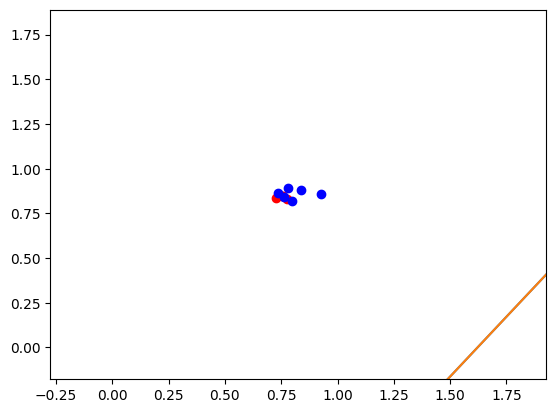

Bobot: [0.0, 0.00013952927068751017, 4.2905883642848356e-05, -4.481603202037112e-05]


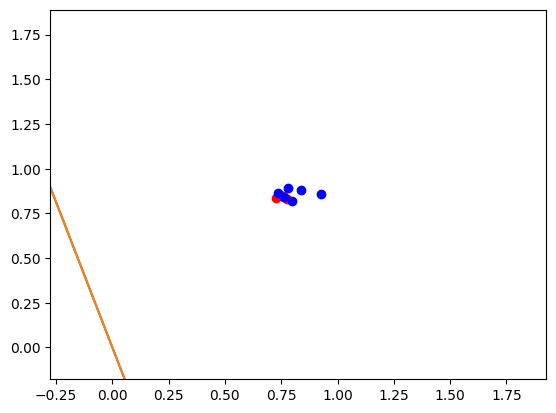

Bobot: [-0.0001, 6.402635944199457e-05, -4.193754959648795e-05, -0.00011098121614748548]


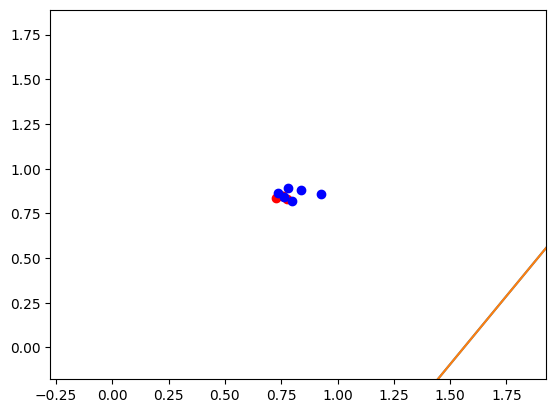

Bobot: [0.0, 0.00013765928225351742, 4.4465917521333286e-05, -4.1956279580827676e-05]


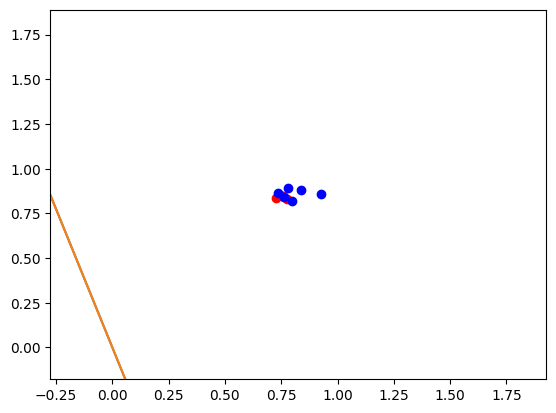


Epoch 7
Bobot: [-0.0001, 6.023993374105135e-05, -3.863290068855929e-05, -0.00010957866064139889]


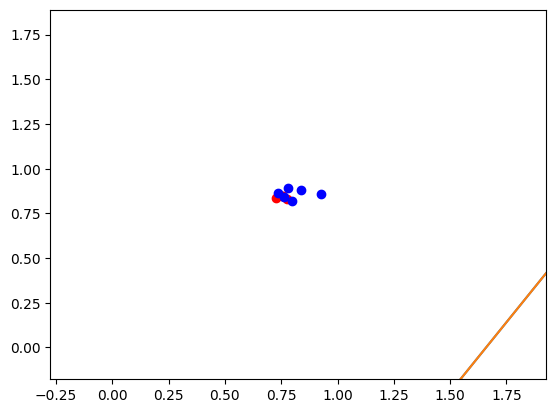

Bobot: [0.0, 0.00014002420113415467, 4.3564135739952026e-05, -3.964067120188488e-05]


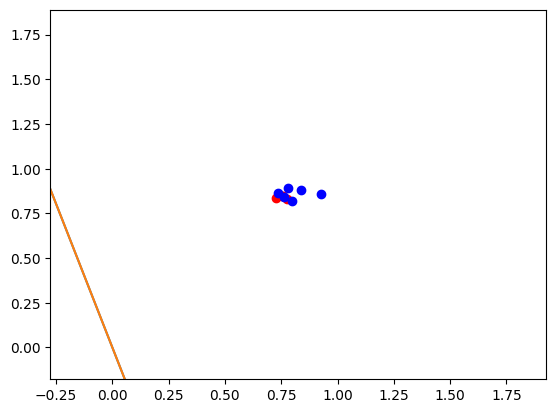

Bobot: [-0.0001, 6.429067599294479e-05, -4.0898156546360646e-05, -0.00010655202162283669]


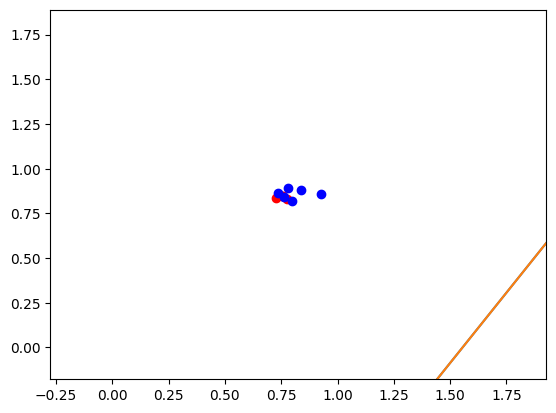

Bobot: [0.0, 0.00015710771276939724, 4.493164151552181e-05, -4.487897080484561e-05]


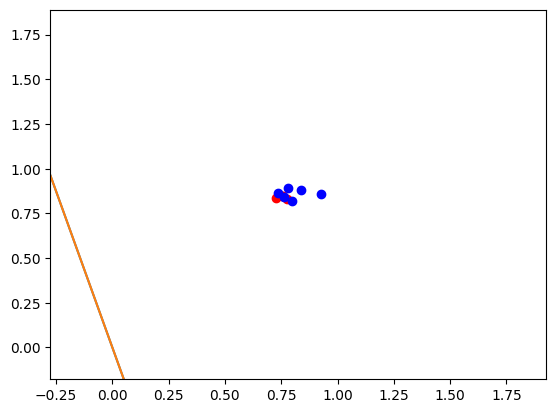

Bobot: [-0.0001, 8.459613837016614e-05, -3.865819104941333e-05, -0.00011395276730006788]


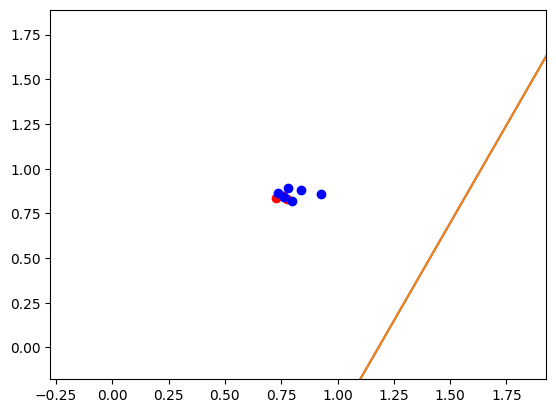

Bobot: [0.0, 0.00016247248439642975, 5.0316869896403904e-05, -5.18087452838424e-05]


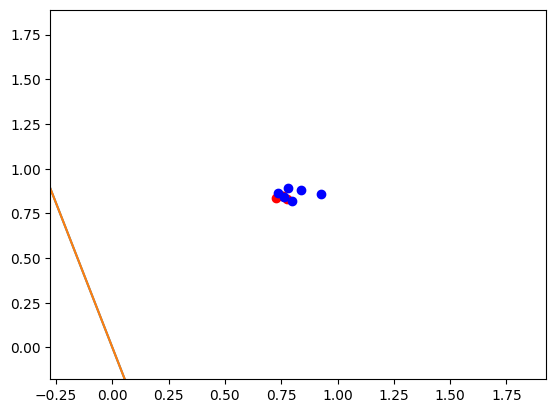

Bobot: [-0.0001, 8.696957315091415e-05, -3.45265633429324e-05, -0.00011797392941095676]


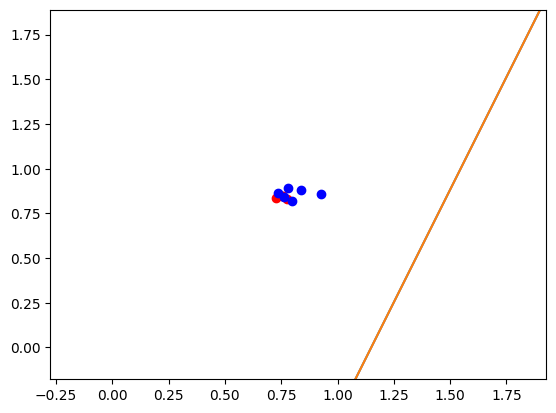

Bobot: [0.0, 0.000160602495962437, 5.187690377488883e-05, -4.8948992844298955e-05]


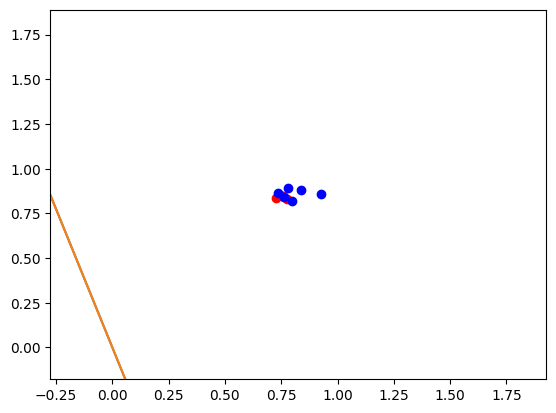


Epoch 8
Bobot: [-0.0001, 8.318314744997093e-05, -3.122191443500374e-05, -0.00011657137390487017]


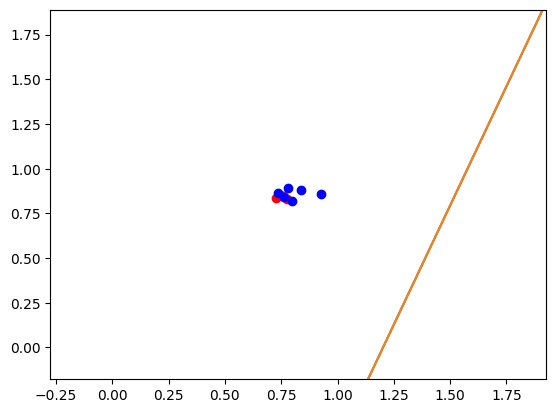

Bobot: [0.0, 0.00016296741484307425, 5.097512199350757e-05, -4.663338446535616e-05]


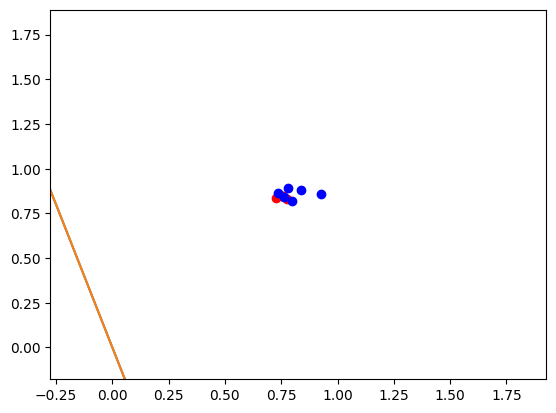

Bobot: [-0.0001, 8.723388970186437e-05, -3.34871702928051e-05, -0.00011354473488630797]


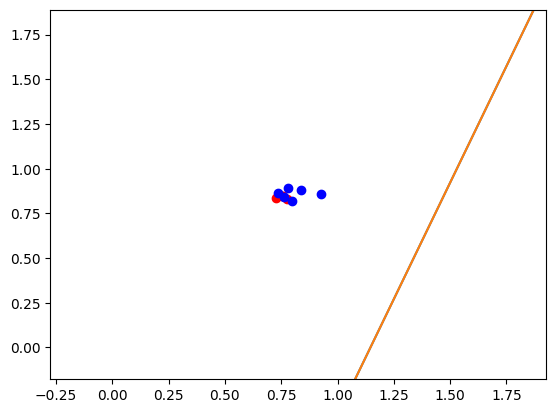

Bobot: [0.0, 0.00018005092647831682, 5.234262776907736e-05, -5.187168406831689e-05]


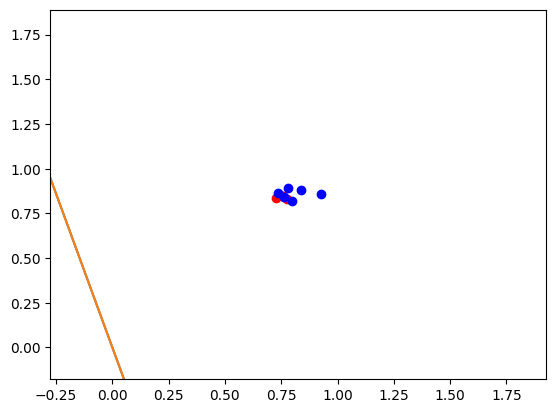

Bobot: [-0.0001, 0.00010753935207908572, -3.1247204795857784e-05, -0.00012094548056353916]


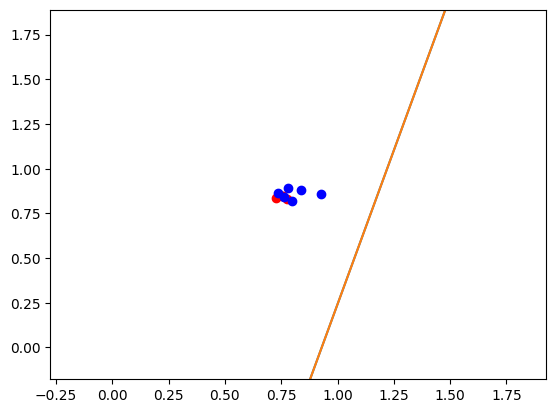

Bobot: [0.0, 0.00018541569810534933, 5.772785614995945e-05, -5.880145854731368e-05]


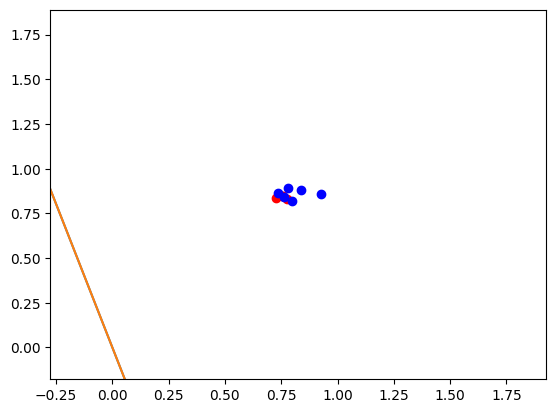

Bobot: [-0.0001, 0.00010991278685983373, -2.7115577089376855e-05, -0.00012496664267442803]


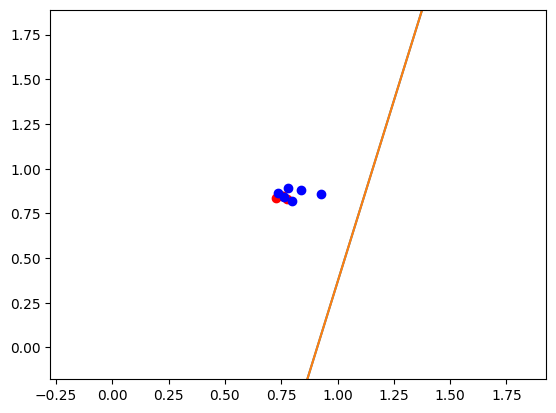

Bobot: [0.0, 0.00018354570967135658, 5.928789002844438e-05, -5.5941706107770234e-05]


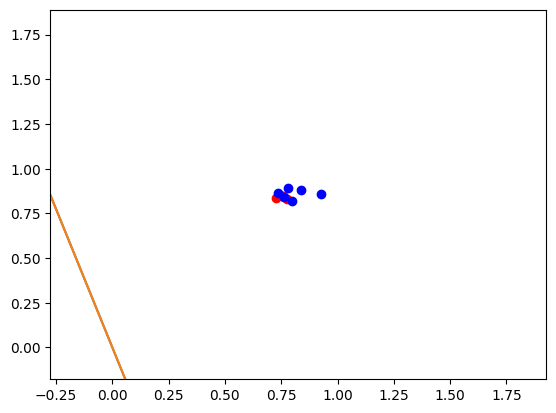


Epoch 9
Bobot: [-0.0001, 0.00010612636115889051, -2.3810928181448195e-05, -0.00012356408716834144]


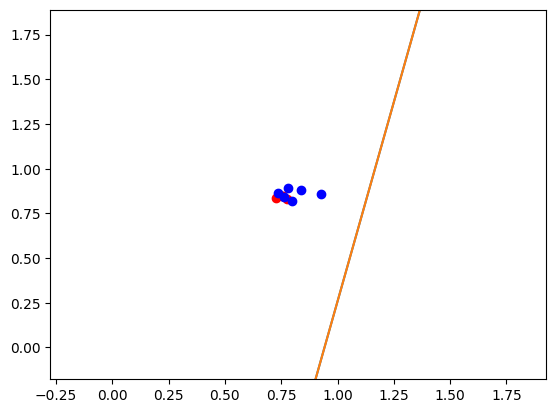

Bobot: [0.0, 0.00018591062855199383, 5.838610824706312e-05, -5.3626097728827436e-05]


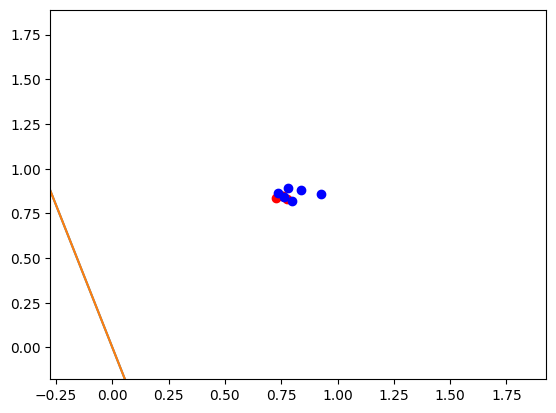

Bobot: [-0.0001, 0.00011017710341078395, -2.607618403924955e-05, -0.00012053744814977925]


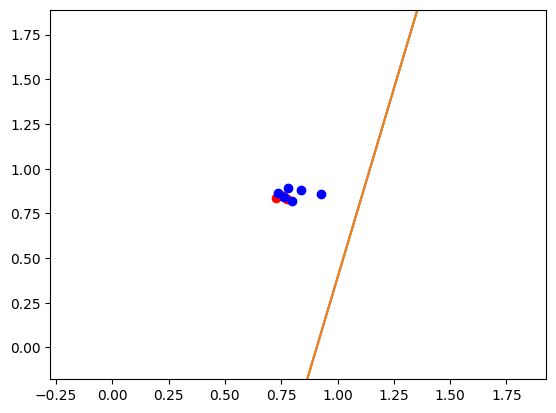

Bobot: [0.0, 0.0002029941401872364, 5.9753614022632905e-05, -5.886439733178817e-05]


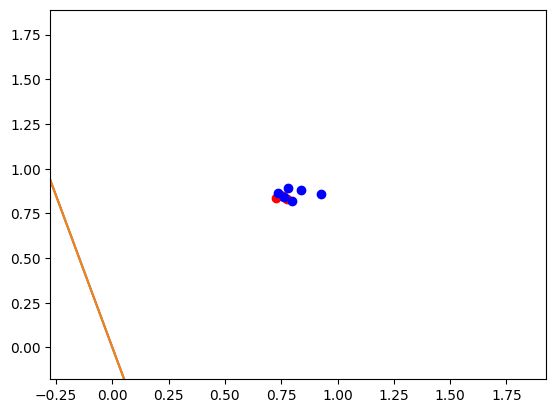

Bobot: [-0.0001, 0.0001304825657880053, -2.3836218542302236e-05, -0.00012793819382701045]


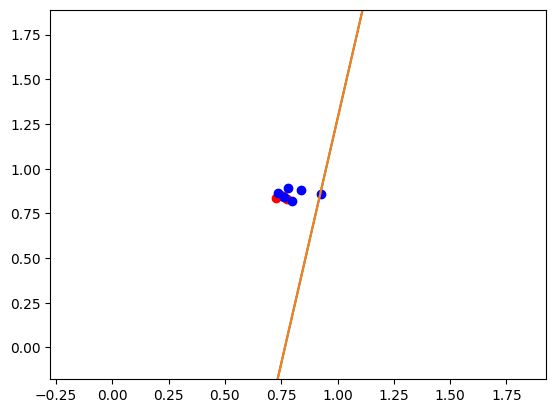

Bobot: [0.0, 0.0002083589118142689, 6.5138842403515e-05, -6.579417181078497e-05]


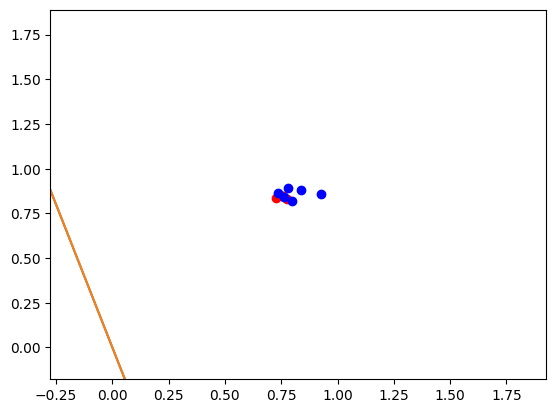

Bobot: [-0.0001, 0.0001328560005687533, -1.9704590835821308e-05, -0.00013195935593789934]


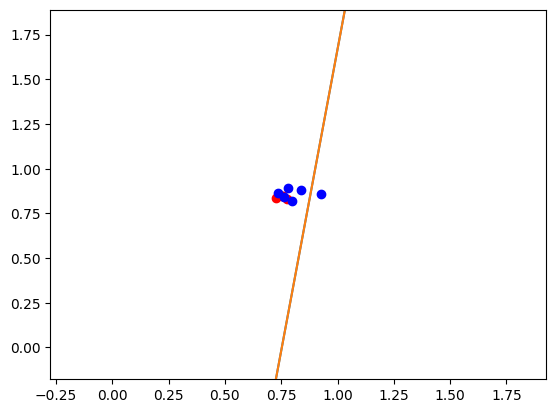

Bobot: [0.0, 0.00020648892338027616, 6.669887628199993e-05, -6.293441937124154e-05]


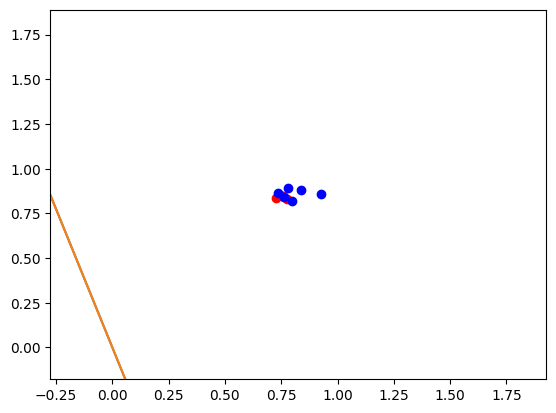


Epoch 10
Bobot: [-0.0001, 0.0001290695748678101, -1.6399941927892648e-05, -0.00013055680043181275]


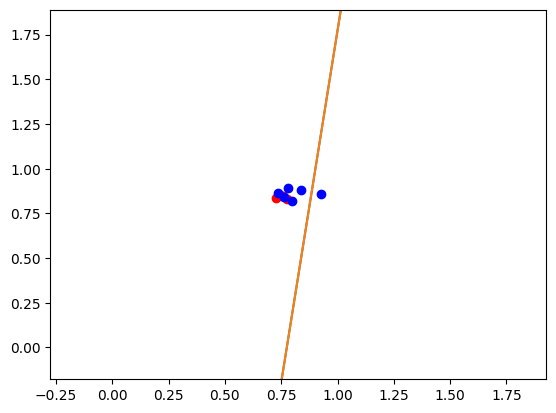

Bobot: [0.0, 0.0002088538422609134, 6.579709450061867e-05, -6.061881099229874e-05]


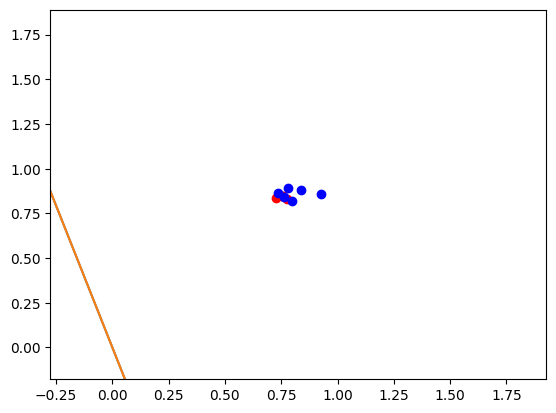

Bobot: [-0.0001, 0.00013312031711970352, -1.8665197785694003e-05, -0.00012753016141325054]


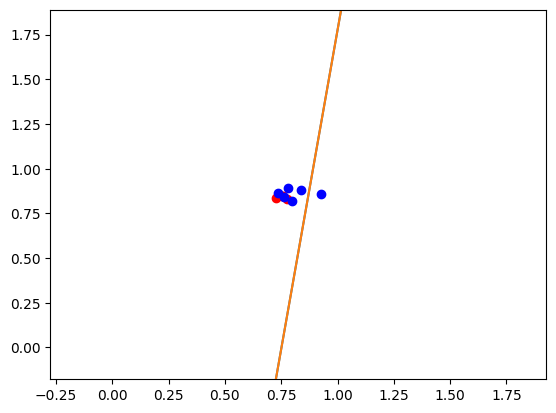

Bobot: [0.0, 0.00022593735389615595, 6.716460027618845e-05, -6.585711059525946e-05]


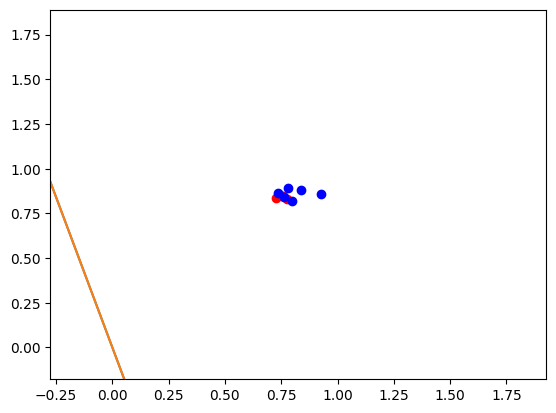

Bobot: [-0.0001, 0.00015342577949692485, -1.642523228874669e-05, -0.00013493090709048173]


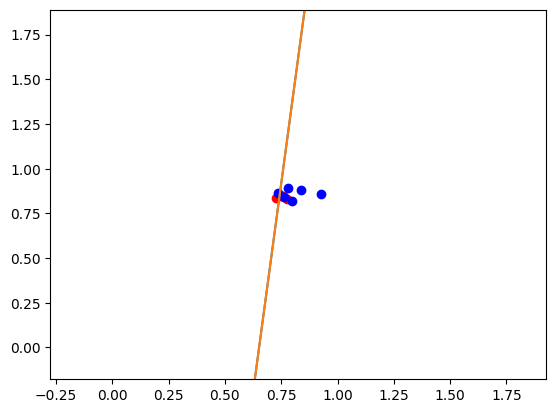

Bobot: [0.0, 0.00023130212552318843, 7.254982865707055e-05, -7.278688507425625e-05]


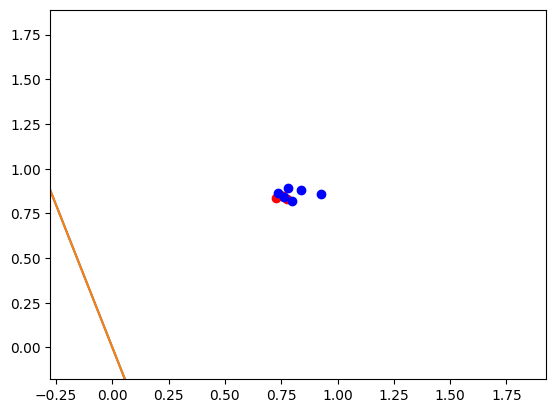

Bobot: [-0.0001, 0.00015579921427767284, -1.229360458226576e-05, -0.00013895206920137062]


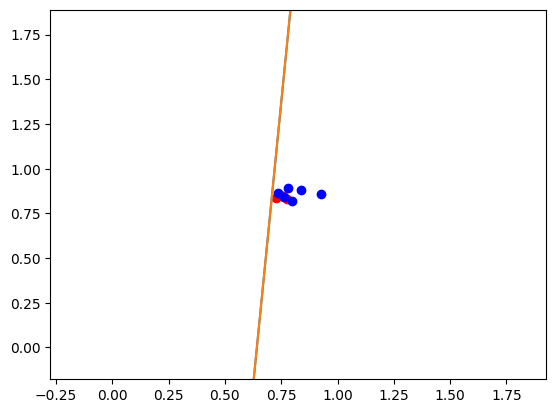

Bobot: [0.0, 0.0002294321370891957, 7.410986253555548e-05, -6.992713263471282e-05]


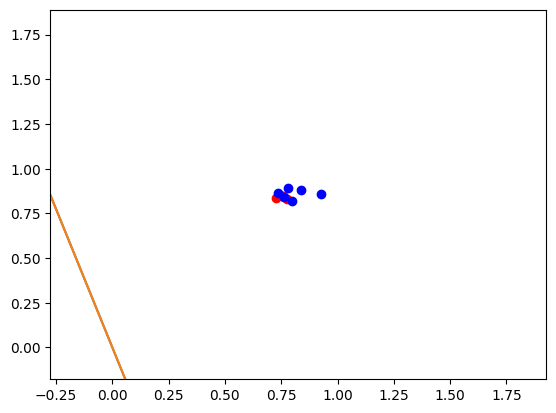

Epochs: 10
Accuracy: 0.4520547945205479


In [12]:
w, epoch = percep_fit(X_train, y_train, a=0.0001 , verbose=True, draw=True) ## Masukkan nilai learning rate sebesar 0.0001
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)


Epoch 1
Bobot: [-1.0, -0.7741934851246607, -0.8309881820989257, -0.676223810605712]


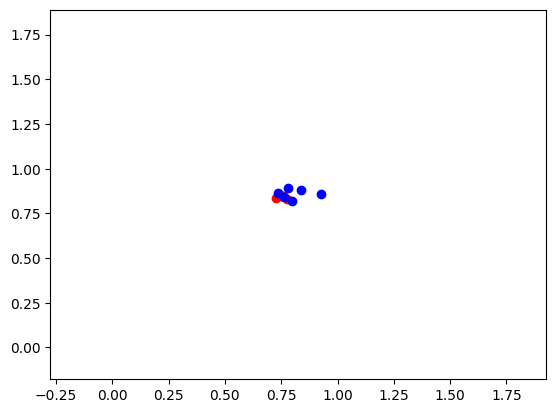

Bobot: [0.0, 0.02364918880637268, -0.009017817813812501, 0.023156083789428017]


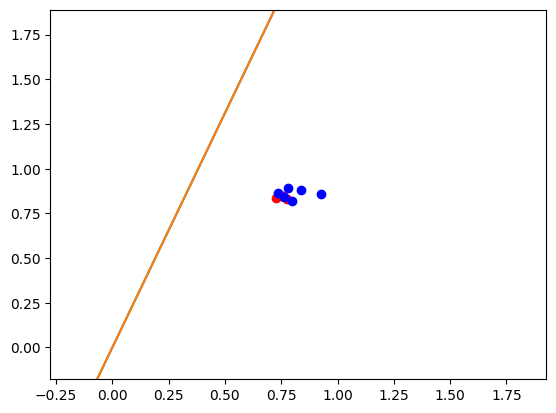

Bobot: [-1.0, -0.7336860626057261, -0.8536407406769392, -0.6459574204200901]


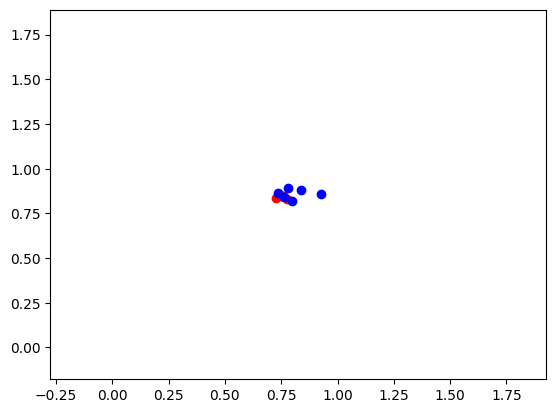

Bobot: [0.0, 0.19448430515879822, 0.004657239941885272, -0.02922691224017926]


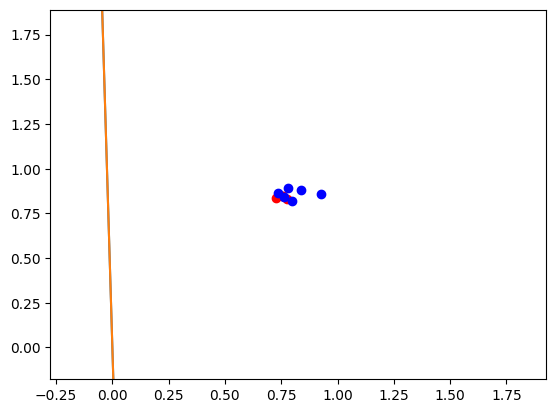

Bobot: [-1.0, -0.5306314388335127, -0.8312410857074661, -0.7199648771924019]


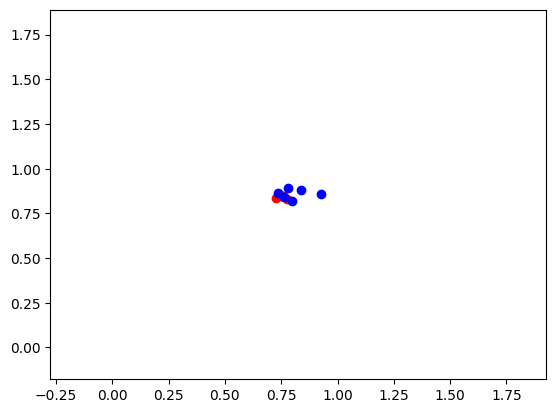

Bobot: [0.0, 0.24813202142912316, 0.05850952375070617, -0.09852465703014712]


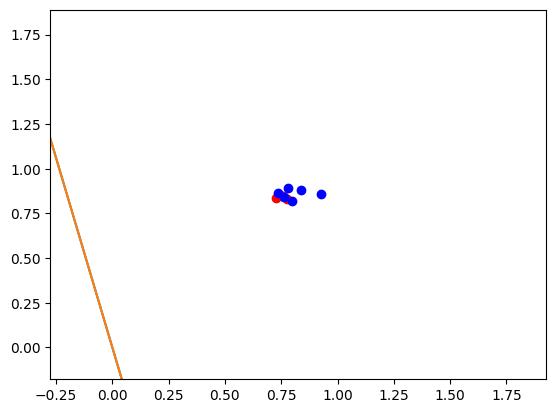

Bobot: [-1.0, -0.5068970910260328, -0.7899248086426568, -0.7601764983012906]


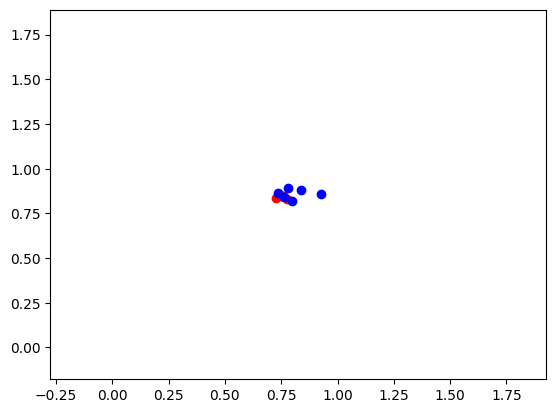

Bobot: [0.0, 0.22943213708919574, 0.07410986253555552, -0.06992713263471273]


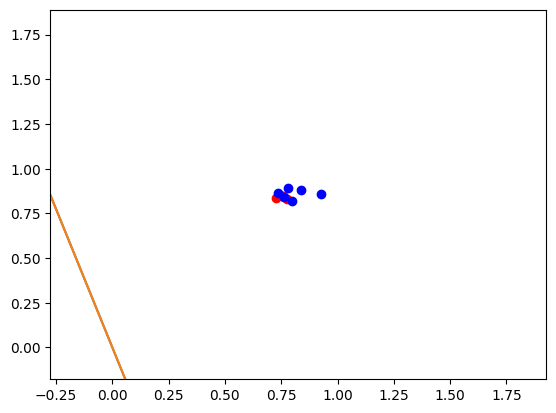


Epoch 2
Bobot: [-1.0, -0.5447613480354649, -0.7568783195633701, -0.7461509432404247]


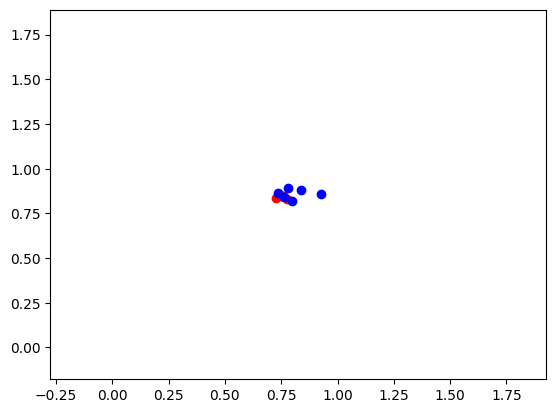

Bobot: [0.0, 0.2530813258955684, 0.06509204472174301, -0.04677104884528471]


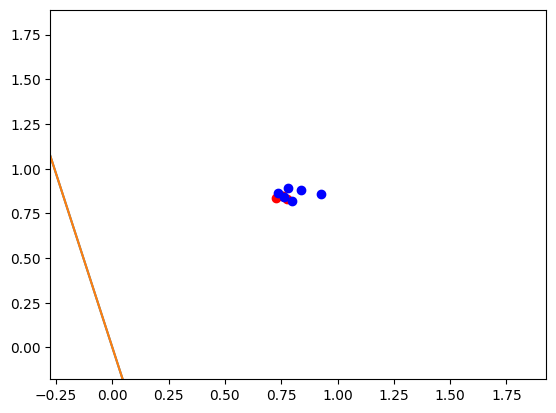

Bobot: [-1.0, -0.5042539255165304, -0.7795308781413837, -0.7158845530548028]


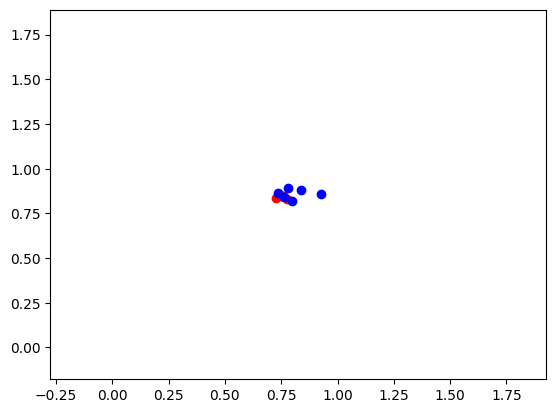

Bobot: [0.0, 0.42391644224799396, 0.07876710247744079, -0.09915404487489199]


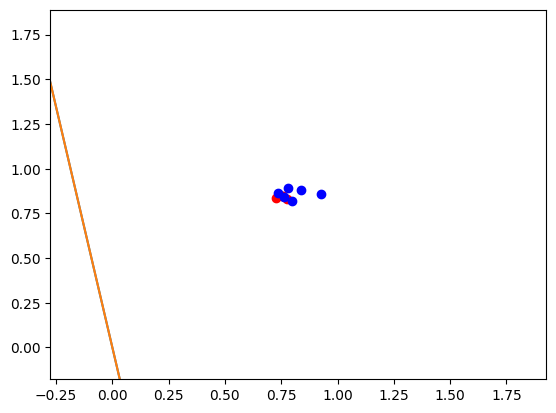

Bobot: [-1.0, -0.30119930174431697, -0.7571312231719106, -0.7898920098271146]


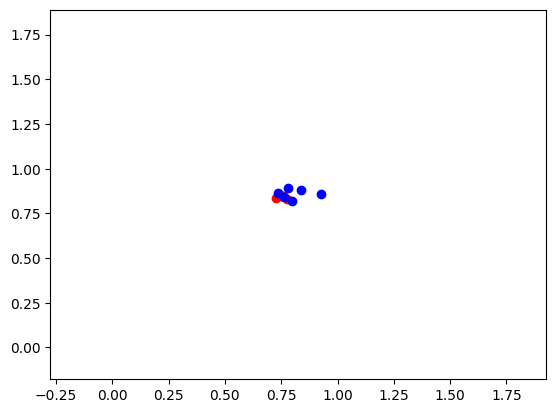

Bobot: [0.0, 0.4775641585183189, 0.1326193862862617, -0.16845178966485985]


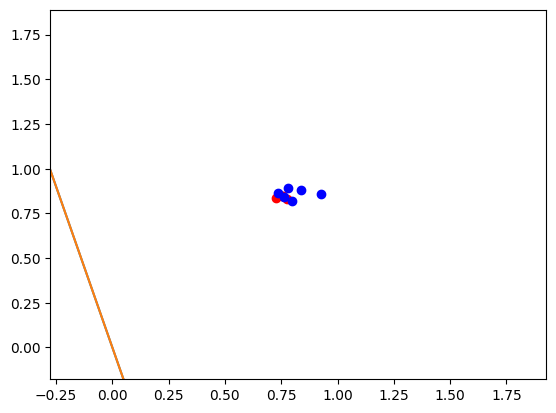

Bobot: [-1.0, -0.277464953936837, -0.7158149461071013, -0.8301036309360034]


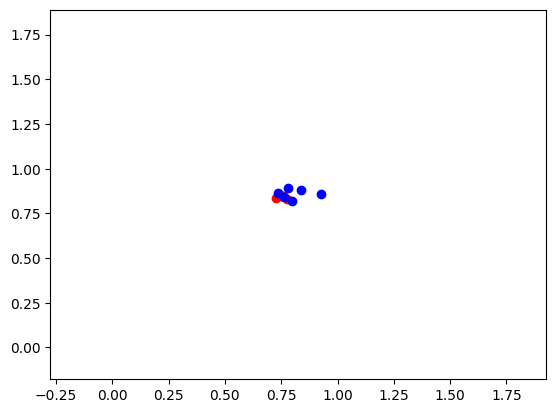

Bobot: [0.0, 0.4588642741783915, 0.14821972507111103, -0.13985426526942546]


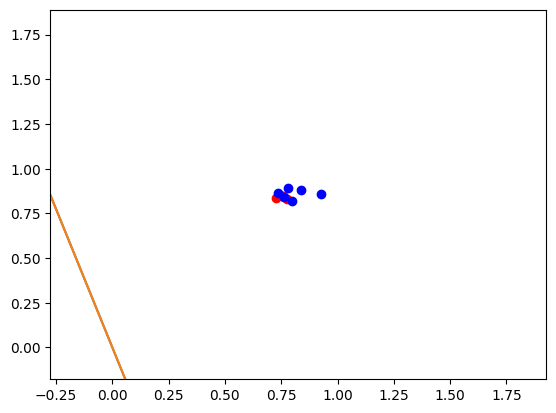


Epoch 3
Bobot: [-1.0, -0.3153292109462692, -0.6827684570278146, -0.8160780758751375]


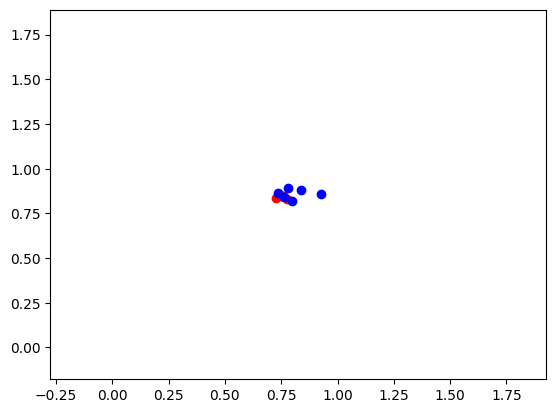

Bobot: [0.0, 0.48251346298476416, 0.13920190725729853, -0.11669818147999744]


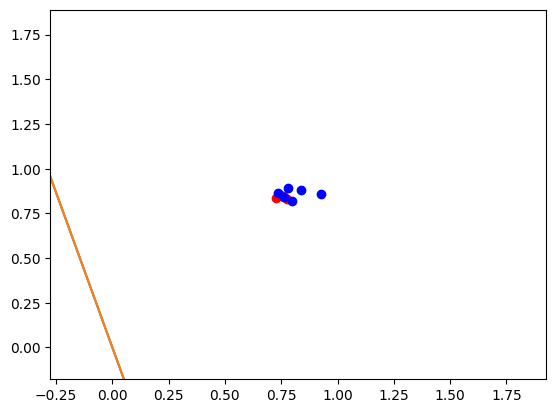

Bobot: [-1.0, -0.2748217884273346, -0.7054210156058282, -0.7858116856895155]


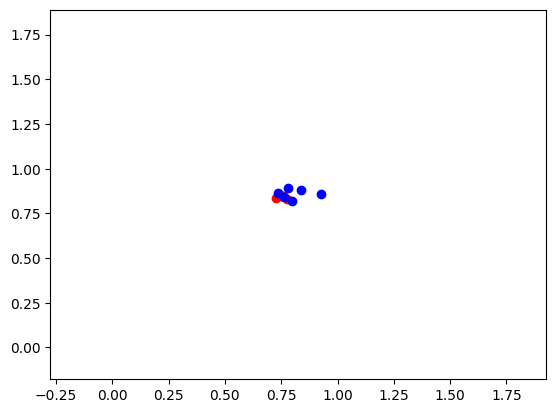

Bobot: [0.0, 0.6533485793371897, 0.1528769650129963, -0.16908117750960472]


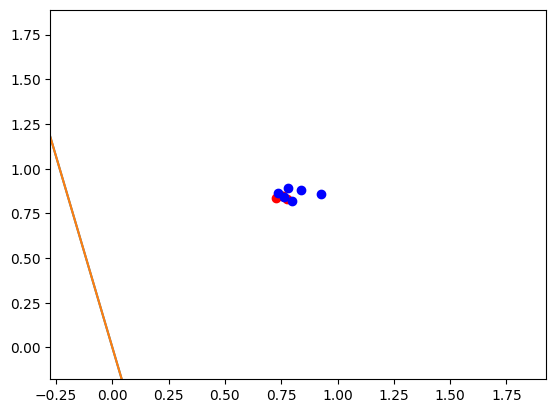

Bobot: [-1.0, -0.07176716465512123, -0.6830213606363551, -0.8598191424618273]


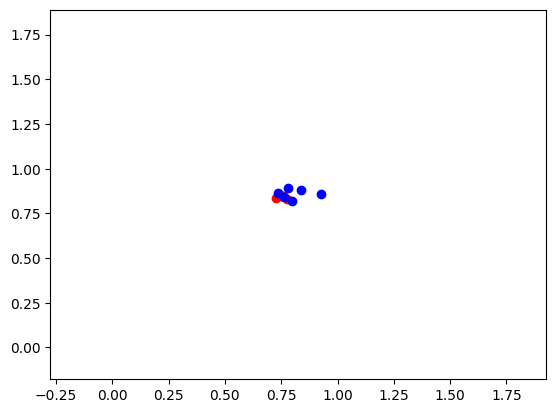

Bobot: [0.0, 0.7069962956075146, 0.2067292488218172, -0.23837892229957258]


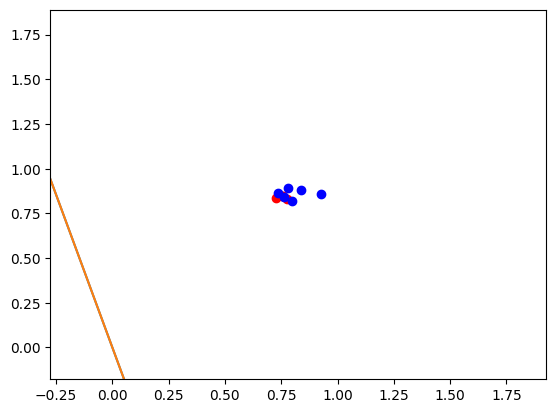

Bobot: [-1.0, -0.04803281684764127, -0.6417050835715458, -0.9000307635707161]


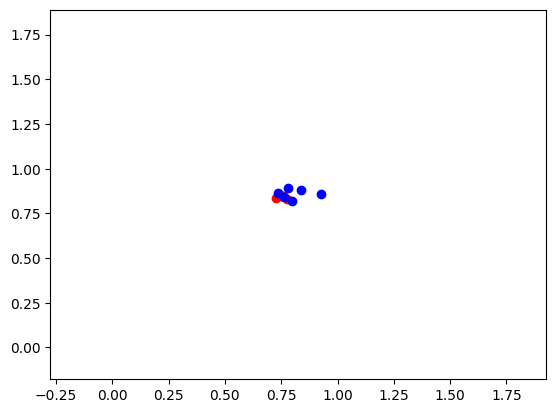

Bobot: [0.0, 0.6882964112675872, 0.22232958760666655, -0.2097813979041382]


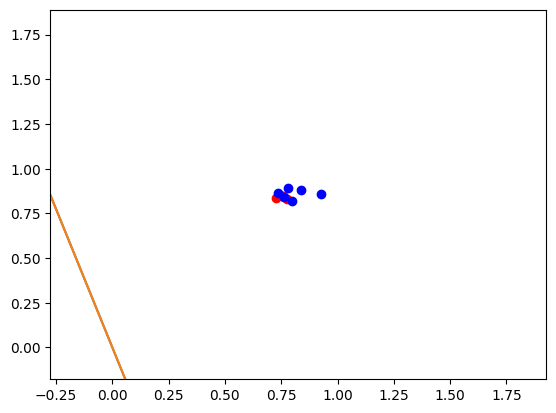


Epoch 4
Bobot: [-1.0, -0.08589707385707346, -0.6086585944922591, -0.8860052085098502]


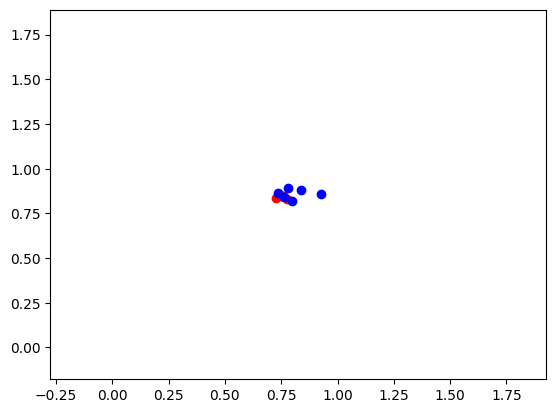

Bobot: [0.0, 0.7119456000739599, 0.21331176979285404, -0.18662531411471017]


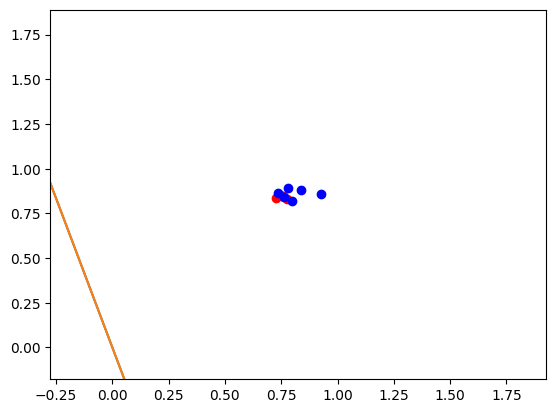

Bobot: [-1.0, -0.04538965133813888, -0.6313111530702726, -0.8557388183242283]


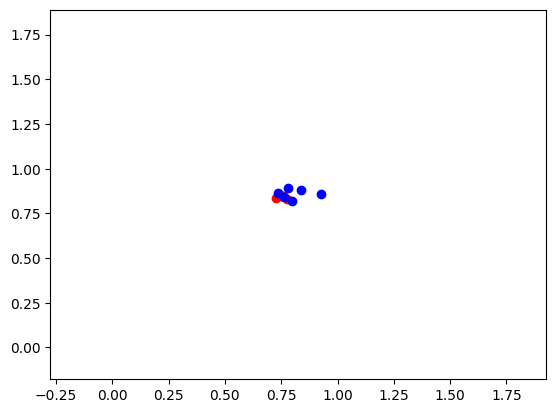

Bobot: [0.0, 0.8827807164263854, 0.22698682754855182, -0.23900831014431745]


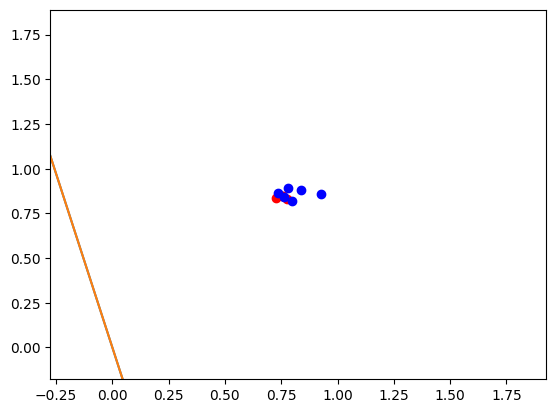

Bobot: [-1.0, 0.1576649724340745, -0.6089114981007996, -0.9297462750965401]


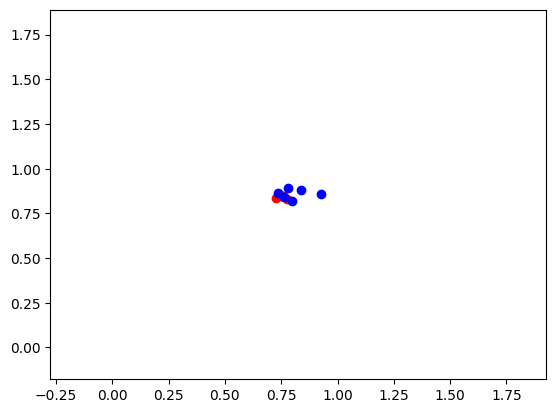

Bobot: [0.0, 0.9364284326967104, 0.2808391113573727, -0.3083060549342853]


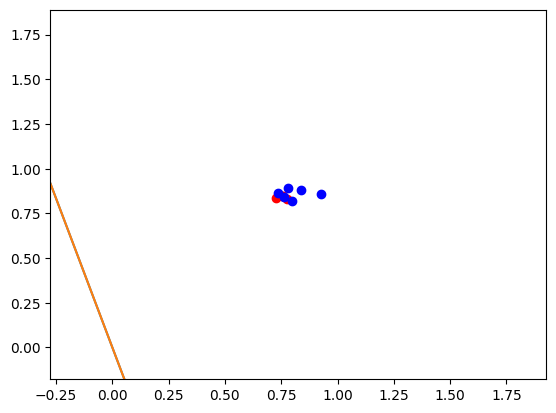

Bobot: [-1.0, 0.18139932024155447, -0.5675952210359902, -0.9699578962054288]


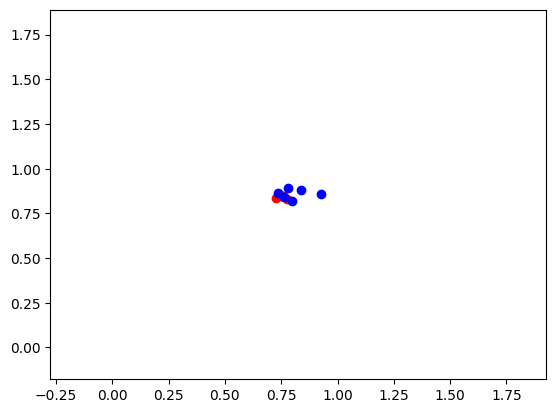

Bobot: [0.0, 0.917728548356783, 0.29643945014222206, -0.2797085305388509]


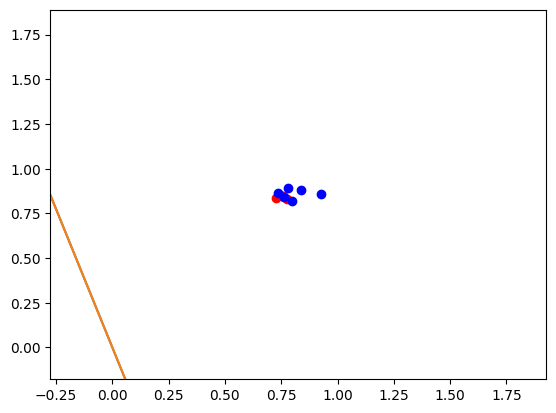


Epoch 5
Bobot: [-1.0, 0.14353506323212228, -0.5345487319567036, -0.9559323411445629]


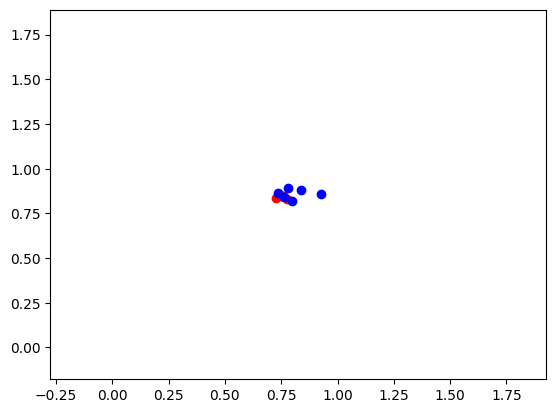

Bobot: [0.0, 0.9413777371631556, 0.28742163232840956, -0.2565524467494229]


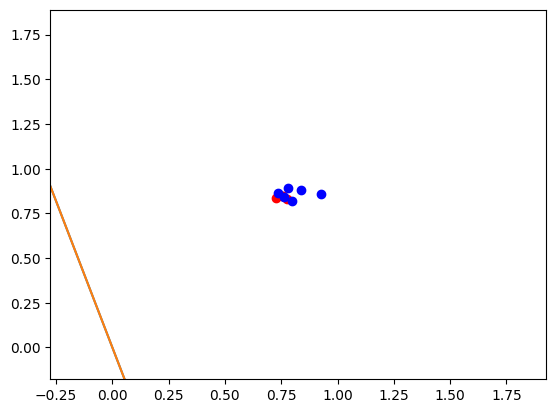

Bobot: [-1.0, 0.18404248575105686, -0.5572012905347171, -0.925665950958941]


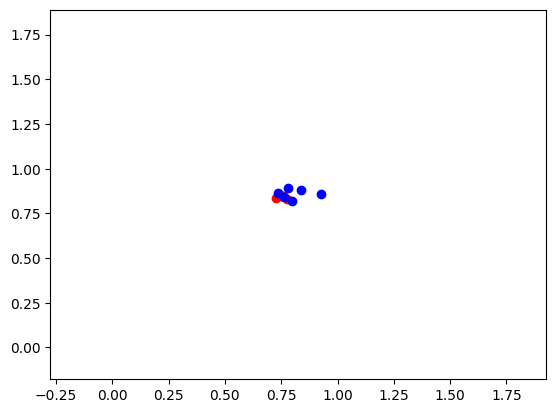

Bobot: [0.0, 1.1122128535155813, 0.30109669008410733, -0.3089354427790302]


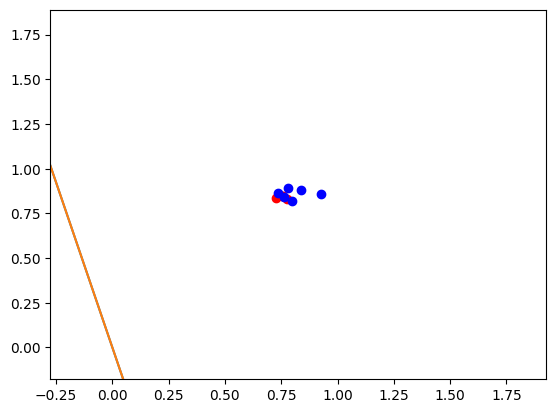

Bobot: [-1.0, 0.38709710952327037, -0.5348016355652441, -0.9996734077312528]


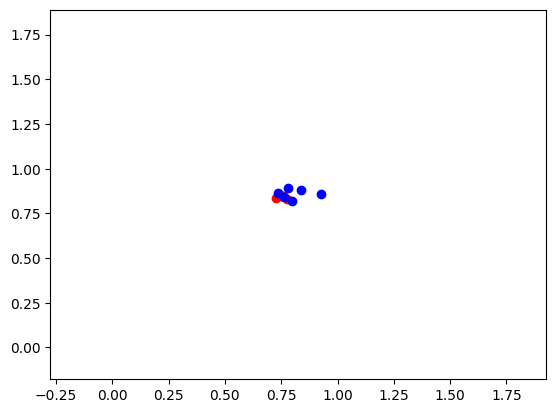

Bobot: [0.0, 1.1658605697859064, 0.35494897389292823, -0.37823318756899804]


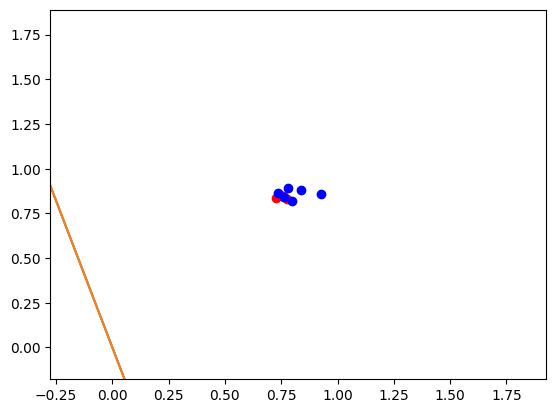

Bobot: [-1.0, 0.41083145733075044, -0.49348535850043473, -1.0398850288401416]


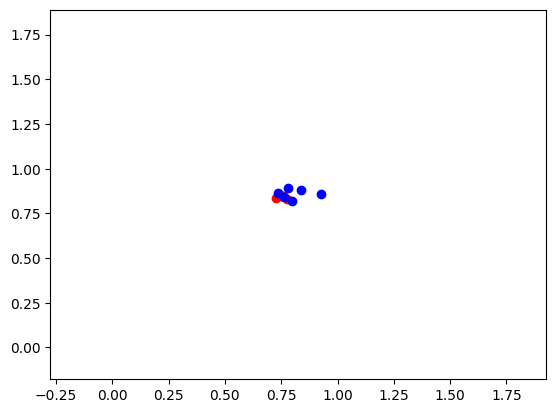

Bobot: [0.0, 1.147160685445979, 0.3705493126777776, -0.34963566317356365]


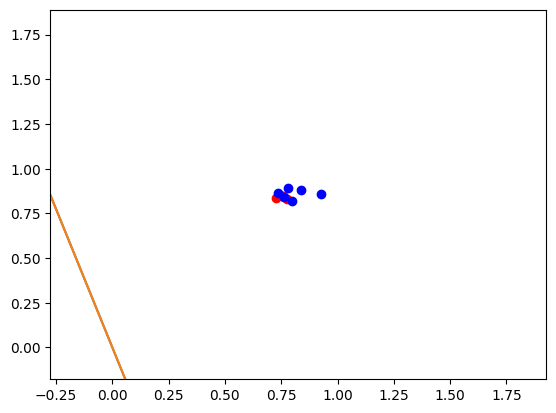


Epoch 6
Bobot: [-1.0, 0.37296720032131836, -0.4604388694211481, -1.0258594737792757]


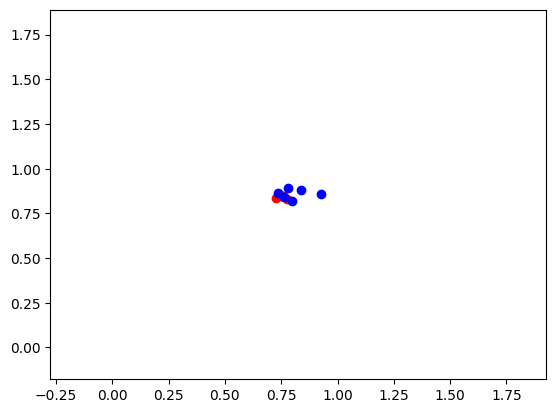

Bobot: [0.0, 1.1708098742523516, 0.3615314948639651, -0.32647957938413563]


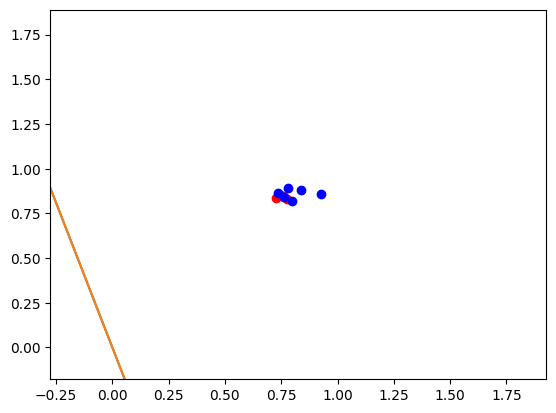

Bobot: [-1.0, 0.4134746228402528, -0.4830914279991616, -0.9955930835936537]


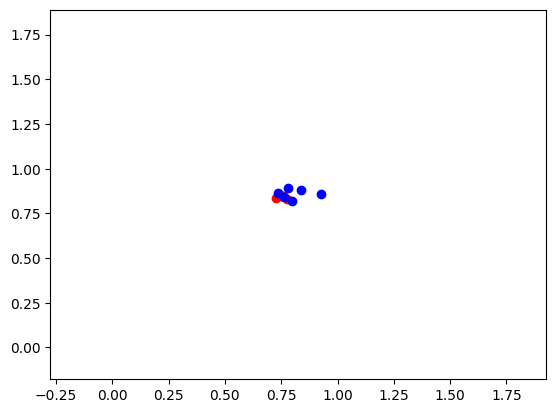

Bobot: [0.0, 1.3416449906047772, 0.37520655261966285, -0.3788625754137429]


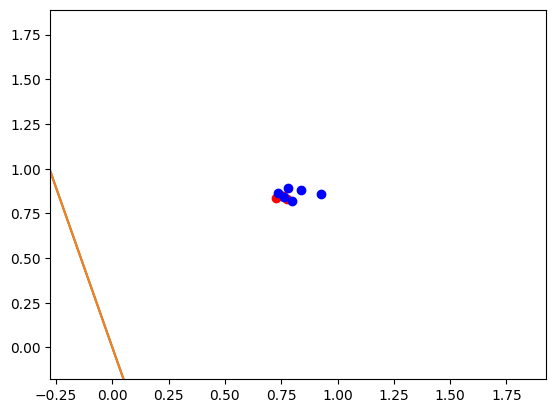

Bobot: [-1.0, 0.6165292466124662, -0.46069177302968856, -1.0696005403659656]


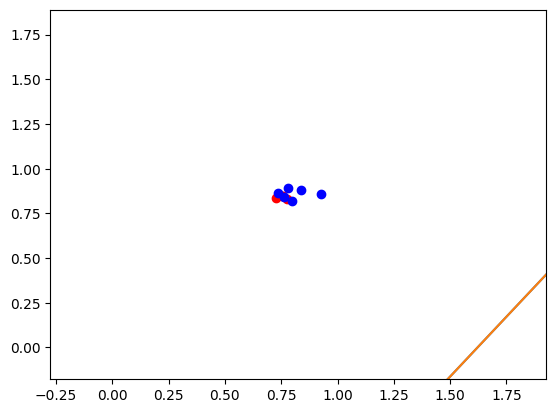

Bobot: [0.0, 1.395292706875102, 0.42905883642848375, -0.4481603202037109]


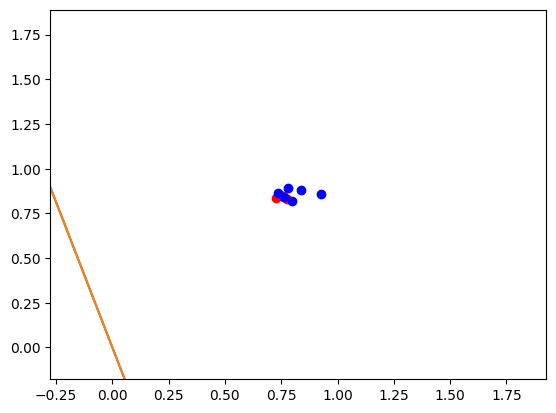

Bobot: [-1.0, 0.6402635944199461, -0.4193754959648792, -1.1098121614748544]


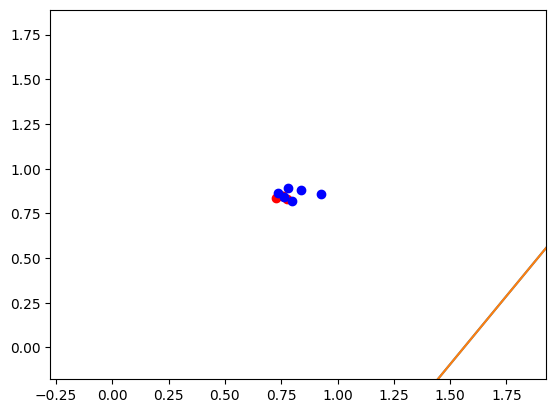

Bobot: [0.0, 1.3765928225351747, 0.4446591752133331, -0.4195627958082765]


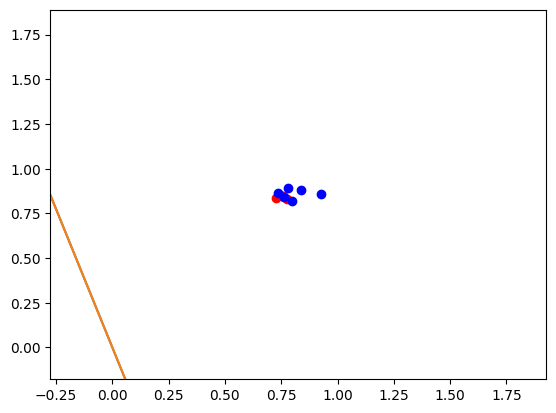


Epoch 7
Bobot: [-1.0, 0.602399337410514, -0.3863290068855926, -1.0957866064139885]


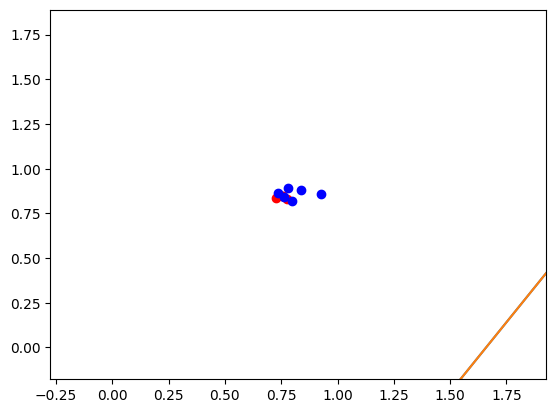

Bobot: [0.0, 1.4002420113415472, 0.4356413573995206, -0.3964067120188485]


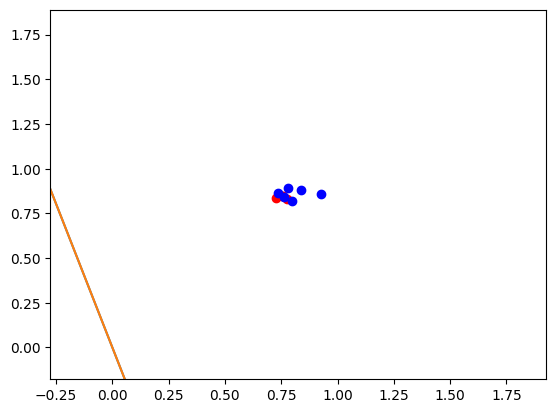

Bobot: [-1.0, 0.6429067599294485, -0.4089815654636061, -1.0655202162283666]


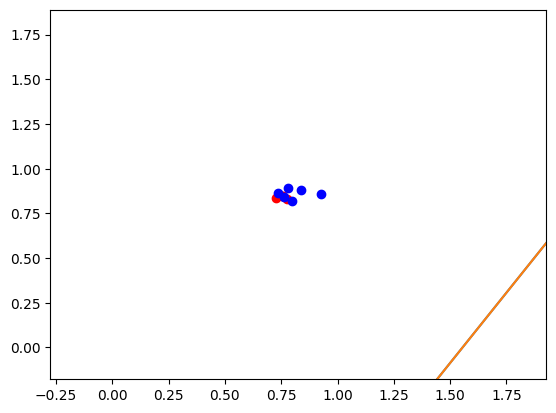

Bobot: [0.0, 1.5710771276939728, 0.44931641515521836, -0.44878970804845575]


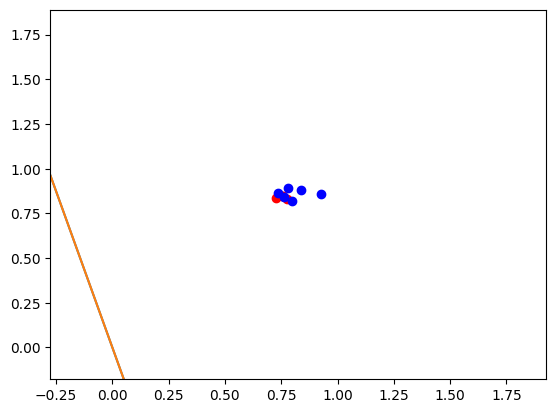

Bobot: [-1.0, 0.8459613837016619, -0.38658191049413304, -1.1395276730006785]


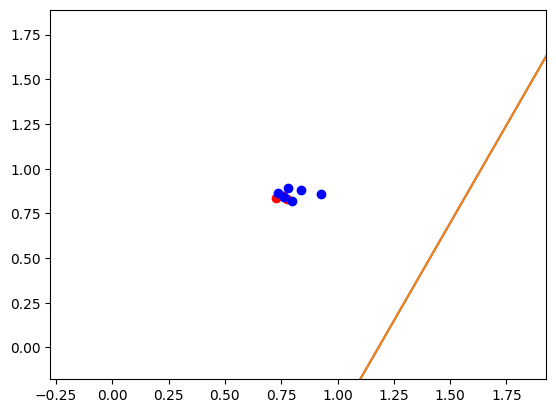

Bobot: [0.0, 1.6247248439642976, 0.5031686989640393, -0.5180874528384237]


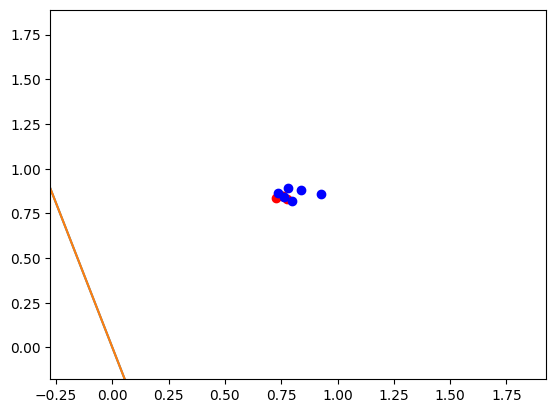

Bobot: [-1.0, 0.8696957315091417, -0.3452656334293237, -1.1797392941095672]


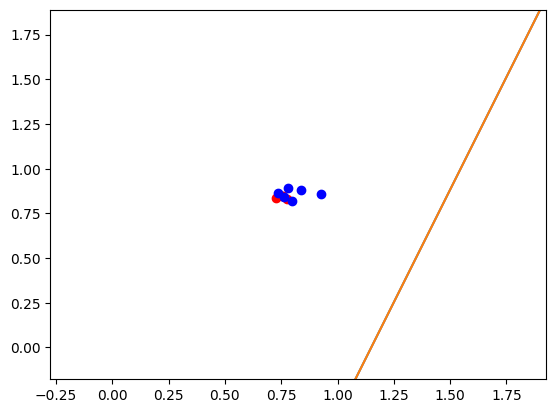

Bobot: [0.0, 1.6060249596243703, 0.5187690377488886, -0.48948992844298933]


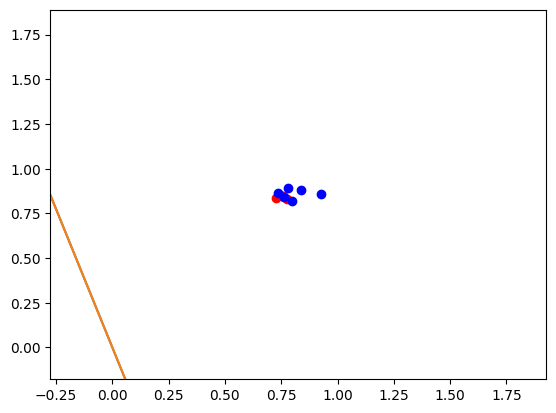


Epoch 8
Bobot: [-1.0, 0.8318314744997096, -0.31221914435003706, -1.1657137390487013]


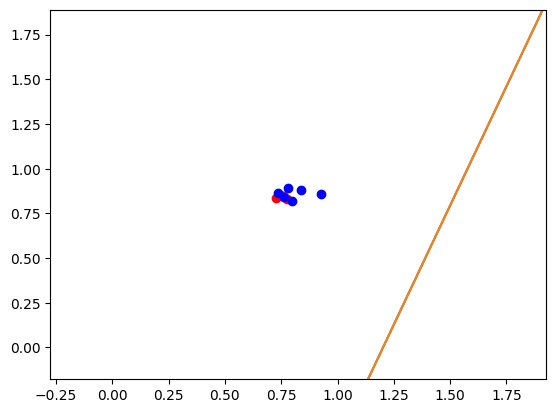

Bobot: [0.0, 1.6296741484307429, 0.5097512199350761, -0.4663338446535613]


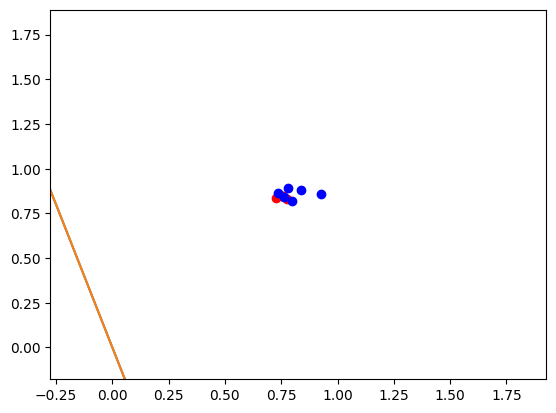

Bobot: [-1.0, 0.8723388970186441, -0.3348717029280506, -1.1354473488630794]


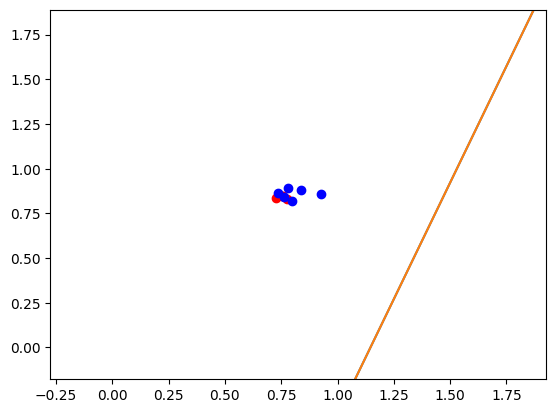

Bobot: [0.0, 1.8005092647831684, 0.5234262776907739, -0.5187168406831686]


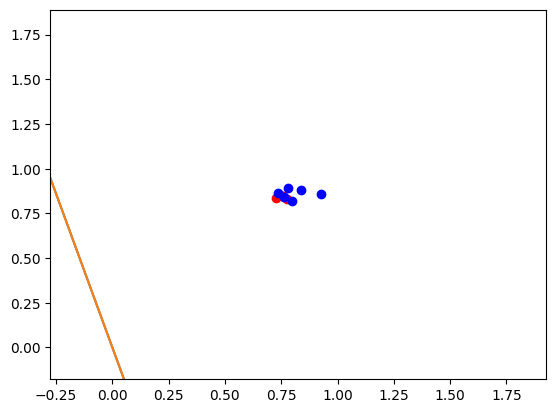

Bobot: [-1.0, 1.0753935207908576, -0.3124720479585775, -1.2094548056353913]


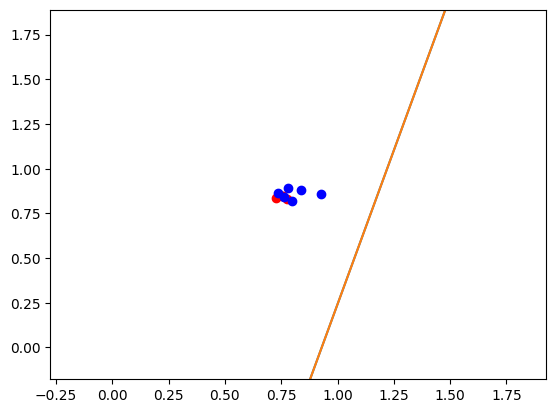

Bobot: [0.0, 1.8541569810534935, 0.5772785614995948, -0.5880145854731366]


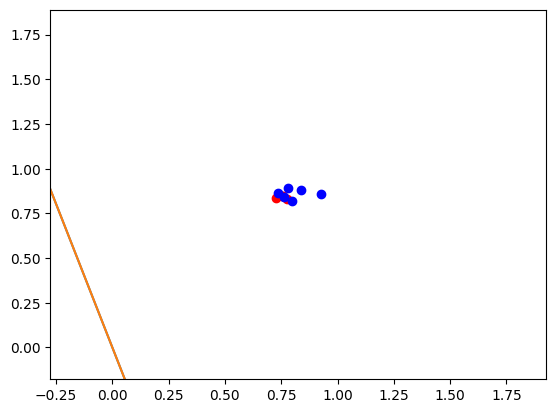

Bobot: [-1.0, 1.0991278685983374, -0.2711557708937682, -1.24966642674428]


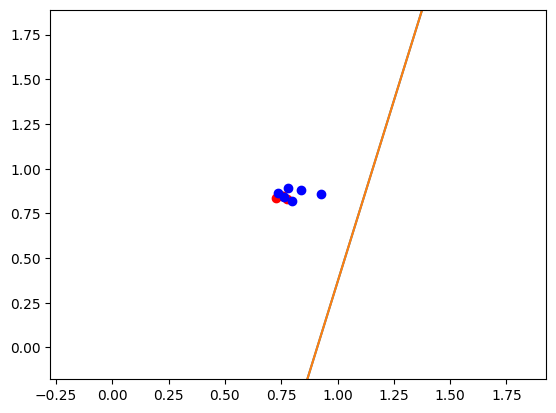

Bobot: [0.0, 1.835457096713566, 0.5928789002844441, -0.5594170610777022]


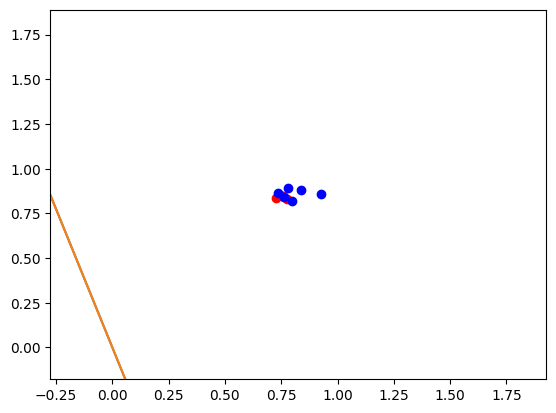


Epoch 9
Bobot: [-1.0, 1.0612636115889051, -0.23810928181448154, -1.2356408716834142]


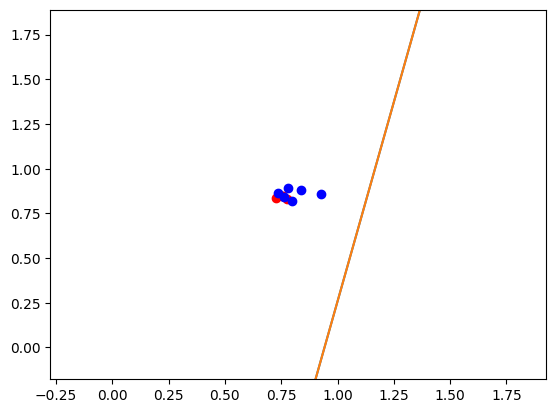

Bobot: [0.0, 1.8591062855199385, 0.5838610824706316, -0.5362609772882742]


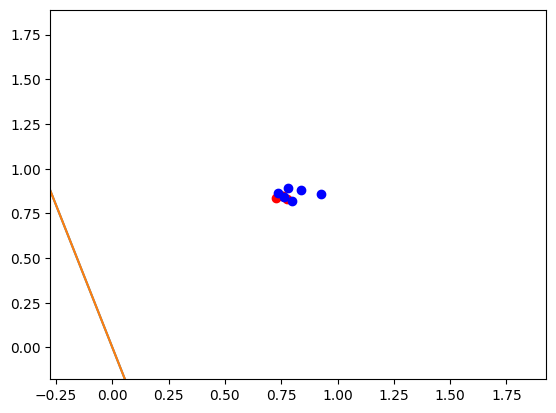

Bobot: [-1.0, 1.1017710341078397, -0.26076184039249506, -1.2053744814977922]


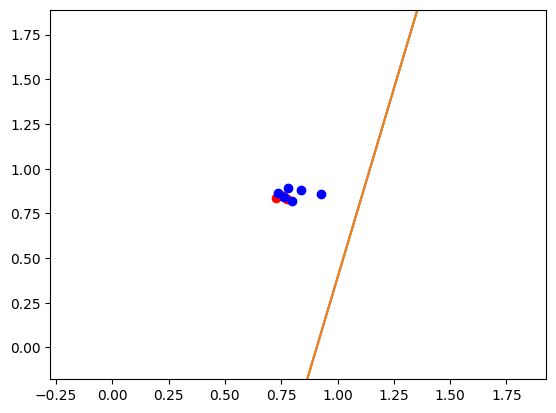

Bobot: [0.0, 2.029941401872364, 0.5975361402263294, -0.5886439733178814]


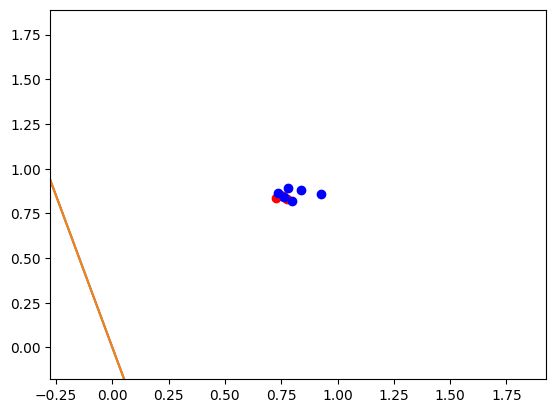

Bobot: [-1.0, 1.3048256578800528, -0.238362185423022, -1.2793819382701042]


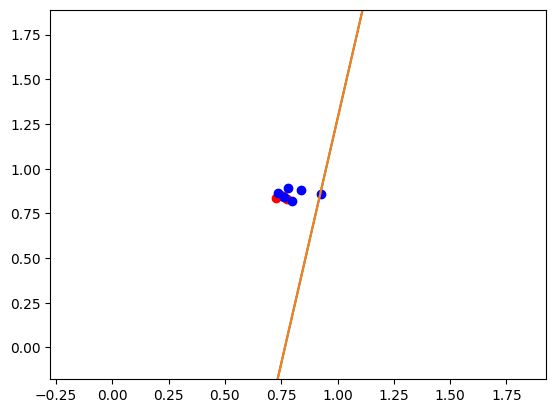

Bobot: [0.0, 2.0835891181426884, 0.6513884240351503, -0.6579417181078494]


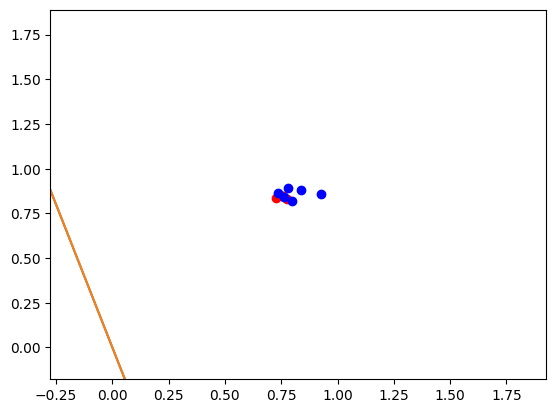

Bobot: [-1.0, 1.3285600056875326, -0.19704590835821267, -1.319593559378993]


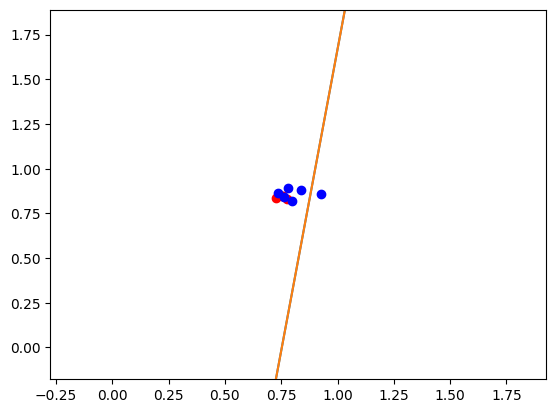

Bobot: [0.0, 2.064889233802761, 0.6669887628199996, -0.629344193712415]


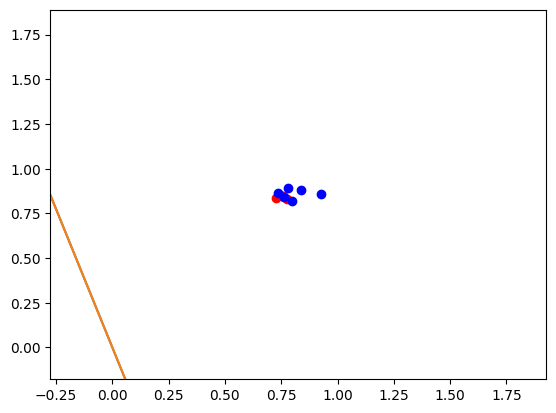


Epoch 10
Bobot: [-1.0, 1.2906957486781003, -0.16399941927892603, -1.305568004318127]


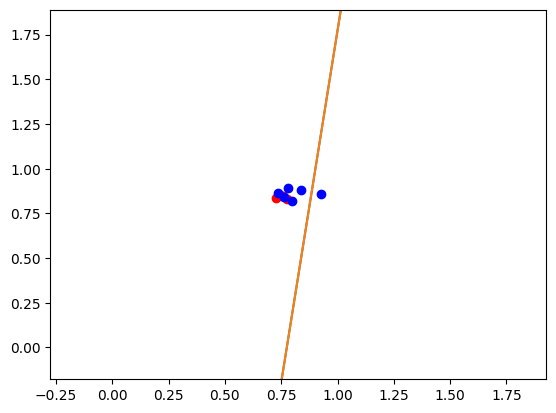

Bobot: [0.0, 2.0885384226091337, 0.6579709450061871, -0.606188109922987]


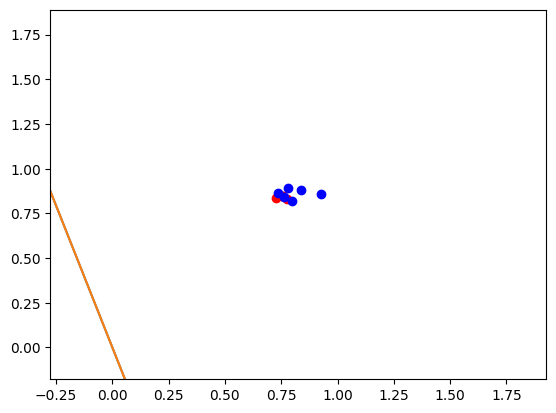

Bobot: [-1.0, 1.331203171197035, -0.18665197785693954, -1.275301614132505]


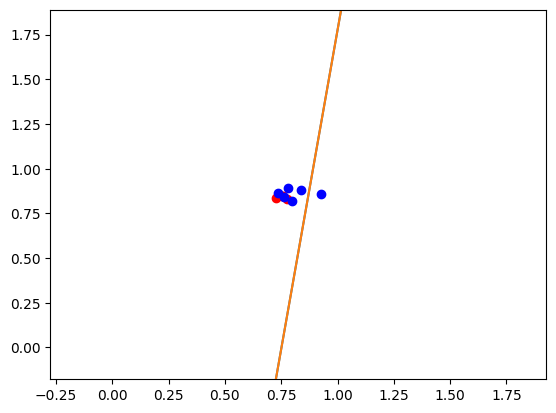

Bobot: [0.0, 2.259373538961559, 0.6716460027618849, -0.6585711059525943]


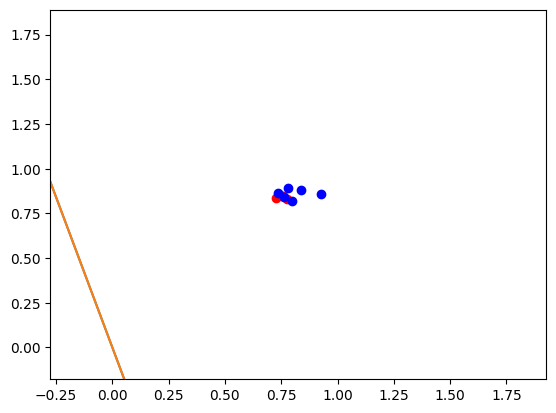

Bobot: [-1.0, 1.534257794969248, -0.1642523228874665, -1.349309070904817]


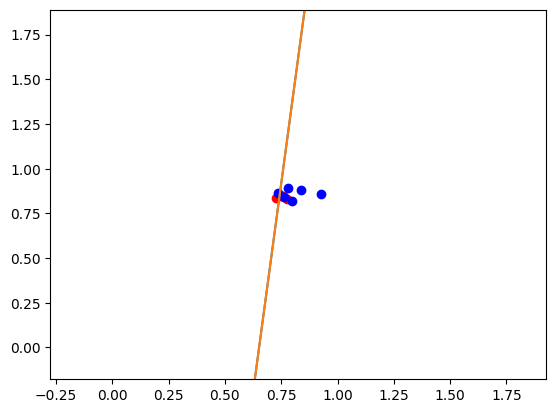

Bobot: [0.0, 2.3130212552318836, 0.7254982865707058, -0.7278688507425622]


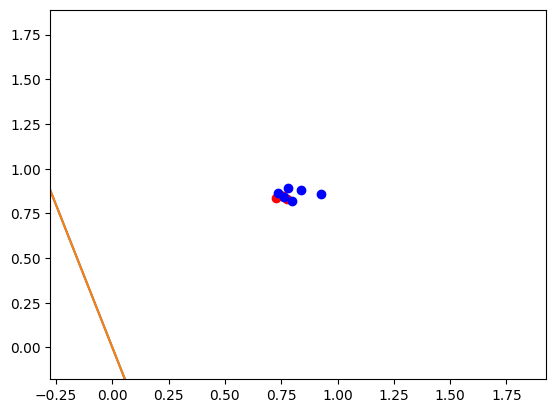

Bobot: [-1.0, 1.5579921427767278, -0.12293604582265716, -1.3895206920137058]


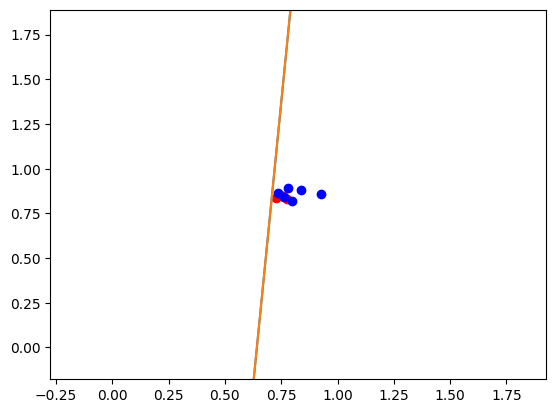

Bobot: [0.0, 2.2943213708919563, 0.7410986253555552, -0.6992713263471279]


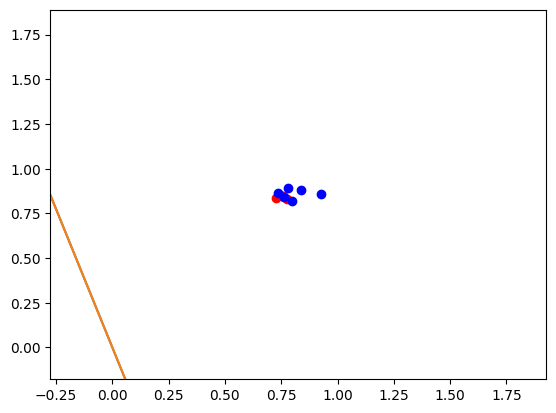

Epochs: 10
Accuracy: 0.4520547945205479


In [13]:
w, epoch = percep_fit(X_train, y_train, a=1, verbose=True, draw=True) ## Masukkan nilai learning rate sebesar 1
out = percep_predict(X_test, w)
accuracy = calc_accuracy(out, y_test)

print('Epochs:', epoch)
print('Accuracy:', accuracy)

**Pertanyaan**  
Dikarenakan training untuk mencapai akurasi 1.0 memakan waktu yang lama kita membatasi max epoch menjadi 10. Perhatikan bobot dari kedua proses training di atas. Bandingkan hasil yang didapatkan dan jelaskan apa pengaruh learning rate yang di masukkan!

Jawab:


Pada percobaan ini, dilakukan learning rate 0.0001 dan 1, dapat ditarik pernyataan bahwa pada percobaan ini, semakin tinggi learning rate tentu nilai bobot akan semakin tinggi. Hal ini dikarenakan learning rate yang mengendalikan seberapa besar perubahan bobot yang terjadi pada setiap iterasi selama proses training. Jika learning rate terlalu tinggi, perubahan bobot bisa menjadi besar, tetapi itu tidak berarti bobot akan selalu meningkat.
